<a href="https://colab.research.google.com/github/intelligent-environments-lab/CityLearn/blob/master/examples/citylearn_rlem23_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CityLearn: A Tutorial on Reinforcement Learning Control for Grid-Interactive Efficient Buildings and Communities
---

Authors:
*   [Kingsley Nweye](https://kingsleynweye.com), The University of Texas at Austin, [nweye@utexas.edu](mailto:nweye@utexas.edu)
*   [Allen Wu](https://www.linkedin.com/in/allenjeffreywu), The University of Texas at Austin, [allen.wu@utexas.edu](mailto:allen.wu@utexas.edu)
* [Hyun Park](), The University of Texas at Austin, [hyun_0421@utexas.edu](mailto:hyun_0421@utexas.edu)
* [Yara Almilaify](https://www.linkedin.com/in/yara-almilaify), The University of Texas at Austin, [yara.m@utexas.edu](mailto:yara.m@utexas.edu)
*   [Zoltan Nagy](https://www.caee.utexas.edu/people/faculty/faculty-directory/nagy), The University of Texas as Austin, [nagy@utexas.edu](mailto:nagy@utexas.edu)

This tutorial notebook will help users get acquainted with the [CityLearn](https://www.citylearn.net) OpenAI Gym environment, developed for easy implementation and benchmarking of control algorithms, e.g., rule-based control, model predictive control or deep reinforcement learning control in the demand response, building energy and grid-interactive community domain. By the end of the tutorial, participants will learn how to design their own simple or advanced control algorithms to provide energy flexibility, and acquire familiarity with the CityLearn environment for extended use in personal projects.

# Glossary
***

- AI - artificial intelligence
- API - application programming interface
- DER - distributed energy resource
- ESS - energy storage system
- EV - electric vehicle
- GEB - grid-interactive efficient building
- GHG - greenhouse gas
- HVAC - heating, ventilation and air conditioning
- KPI - key performance indicator
- MPC - model predictive control
- PV - photovoltaic
- RBC - rule-based control
- RLC - reinforcement learning control
- SoC - state of charge
- TES - thermal energy storage
- ToU - time of use
- ZNE - zero net energy

<a name="overview"></a>
# Overview
---

This workshop will consist of a presentation of the underlying background for CityLearn and its relevance to climate change mitigation. We provide a walk-through tutorial on how to set up and interact with the simulation environment using a real-world dataset from a grid-interactive residential community in Fontana, California.

This notebook will provide a guide on how to use a simple rule-based control architecture and advanced reinforcement control algorithms to manage batteries in each home in the community with a goal of minimizing the cost of purchased electricity, carbon emissions associated with consuming electricity from the grid, as well as improve on other grid-level KPIs e.g. peak demand, load factor and ramping that are critical for the long-term sustainability of decarbonizing existing power generation sources on the supply side and electrification of buildings on the demand side.

## Contributions

The primary contribution of this tutorial is to introduce the software tool, CityLearn, to model and benchmark simple and advanced control strategies in grid-interactive smart communities, e.g., demand response and load shaping in buildings. The secondary contribution is to bring awareness to datasets for controls research that are provided within the CityLearn environment.

## Learning Outcomes

<img src="https://media.giphy.com/media/PLHdpauwfN2MvHcHxL/giphy.gif" height=200></img>

The primary learning outcome for participants is to gain familiarity with CityLearn environment, its application programming interface (API) and dataset offerings for extended use in academic research or personal projects. Other secondary outcomes are to:

1. Understand how electrification, distributed energy resources e.g. batteries, photovoltaic (PV) systems and smart controls provide a promising pathway to decarbonization and energy flexibility.
2. Learn how to design and optimize their own rule-based control (RBC) agent for battery management using readily available knowledge of a building's energy use.
3. Identify the challenges surrounding the generalizability of an RBC agent and how reinforcement learning (RL) can mitigate these challenges.
4. Train their own RL Tabular Q-Learning algorithm.
5. Evaluate the performance of a standard model-free deep RL algorithm in optimizing key performance indicators (KPIs) that are targeted at quantifying energy flexibility, environmental and economic costs.
6. Learn the effect of different control algorithms and their parameters in improving these KPIs.

<a name="climate-impact"></a>
# Climate Impact
---

The residential building stock in the United States is responsible for 21% ([Energy Information Administration, 2022](https://www.eia.gov/totalenergy/data/monthly/archive/00352211.pdf)) of energy consumption and 20% of greenhouse gas emissions ([Goldenstein et al., 2020](https://doi.org/10.1073/pnas.1922205117)). Electrification of end-uses, as well as decarbonizing the electrical grid through renewable energy sources such as solar and wind, constitutes a pathway to zero-emission buildings ([Leibowicz et al., 2018](https://doi.org/10.1016/j.apenergy.2018.09.046)). However, electrifying fossil-fueled building end-uses in fact could increase the demand on the existing electricity power grid and if power generation sources are not decarbonized at a similar rate as electrification happening on the demand side, will in fact result in adverse effects of increased greenhouse gas (GHG) emissions. Also, new grid infrastructure constitutes a significant capital investment and requires extensive planning and execution.

Through distributed energy resources (DERs), buildings can provide flexibility services to the existing grid infrastructure in demand response events. On-site solar photovoltaic (PV) systems can also reduce dependence on the grid through self-generation. Yet, the intermittency of renewable energy sources introduces additional challenges of grid instability due to a mismatch between electricity generation (supply) and demand ([Suberu et al., 2014](https://doi.org/10.1016/j.rser.2014.04.009)). The California duck-curve is a good illustration of the mismatch in renewable supply and demand, and shows the effect of increased PV penetration that may lead to high ramp rate after the sun sets in the evening which the electric power grid may not be able to handle ([Denholm et al., 2008](https://www.nrel.gov/docs/fy08osti/42305.pdf)).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/california_duck_curve.png?raw=true"  width="600" alt="Load shapes in California with various PV penetration scenarios in the United States western grid.">
  <figcaption>Figure: Load shapes in California highlighting the duck curve caused by various PV penetration scenarios in the western United States grid (modified from <a href="https://www.nrel.gov/docs/fy08osti/42305.pdf">Denholm et al., 2008</a>).</figcaption>
</figure>

Advanced control algorithms including model-predictive control (MPC) and reinforcement learning control (RLC) are thus, critical to properly manage DERs and even out the supply-demand imbalance brought about by renewable energy sources. However, a major challenge for the adoption of reinforcement learning (RL) in grid-interactive efficient buildings (GEBs) is the ability to benchmark control algorithm performance to accelerate their deployment on live systems.

CityLearn ([Vazquez-Canteli et al., 2019](https://doi.org/10.1145/3360322.3360998)) provides a platform for such benchmarking tasks. The different stakeholder in the energy and real-estate market including, utility companies, grid-operators, home-owners and policy makers can utilize CityLearn to make decisions on what control policies are viable and provide the best performance as more controllable DERs become available.

<a name="target-audience"></a>
# Target Audience
---

The target audience for this tutorial includes the following:
 - Academic, private and commercial researchers or professionals that are interested in sustainable artificial intelligence (AI)-related pathways to electrification and building decarbonization.
 - AI enthusiasts with at least beginner level of expertise in programming or data science whom may have or pick interest in solving control problems or are interested in learning about a new reinforcement learning (RL) environment that deviates from popular simpler problems e.g. the [Atari](https://www.gymlibrary.dev/environments/atari/), [MuJoCo](https://www.gymlibrary.dev/environments/mujoco/) and [Box2D](https://www.gymlibrary.dev/environments/box2d/) Gym environments, to real-world problems with urgency like climate change mitigation and decarbonization of the electric grid infrastructure and building end-uses.

<a name="prereqs"></a>
# Prerequisites
---

> ⚠️ **NOTE**:
> This CityLearn tutorial has a fairly low entry level and participants do not need to have prior experience in reinforcement learning (RL) nor use of a Gym environment. However, participants need to have at least, beginner knowledge in Python or other similar high-level scripting language.

The [Building Optimization Testing (BOPTEST) tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra?usp=sharing#scrollTo=Ae18iXNKWV5I) provides a __very__ good overview on some of the topics and methods that are discussed and applied in this tutorial. While we will briefly provide background on some of these topics and methods, it is encouraged but not required, that participants in this tutorial first read up the following sections in the [BOPTEST tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra?usp=sharing#scrollTo=Ae18iXNKWV5I):

- [Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_)
- [The OpenAI-Gym Standard](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=7YnuNAQdM_L2)

Other prerequisites that are technical in nature are:
- Beginner knowledge in Python
- Basic knowledge about [Object-Oriented Programming (OOP) in Python 3](https://realpython.com/python3-object-oriented-programming/) and the use of inheritance
- Familiarity with the Jupyter Notebook environment

<a name="background"></a>
# Background
---


## Grid-Interactive Efficient Buildings and their Energy Flexibility

As buildings become electrified and the penetration of renewable energy source increases, a smart approach to manage and control building loads to ensure that these developments do not bring about grid insecurity is needed. The Department of Energy (DOE), introduced the __Grid-Interactive Efficient Building (GEB)__ Initiative to promote the integration of distributed energy resources (DERS) such as photovoltaic (PV) systems, electric vehicles (EVs), active and passive storage systems e.g. batteries, thermal storage tanks and thermal mass (walls) in buildings that can provide the grid with energy flexibility. A GEB is defined by [Neukomm et al., 2019](https://www1.eere.energy.gov/buildings/pdfs/75470.pdf)] as:

> [...] an energy-efficient building that uses smart technologies and on-site DERs to provide demand flexibility while co-optimizing for energy cost, grid services, and occupant needs and preferences, in a continuous and integrated way.

GEBs are characterized by their energy efficiency, interconnectivity, smartness and energy flexibility as highlighted in the figure below:

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building-neukomm.png?raw=true"  width="600" alt="The characteristics of a Grid-Interactive Efficient Building (GEB)">
  <figcaption>Figure: The characteristics of a Grid-Interactive Efficient Building (GEB) (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

The energy efficiency of GEBs by means of tighter envelopes and high-quality construction that minimize heat losses lead to reduced loads without the need to make changes to a building's function or for changes in occupant preferences. PV adoption in GEBs provides self-generation capabilities which reduce the net load (difference between building end-use load and renewable energy generation) that will otherwise be satisfied by the electric grid alone. To then solve the duck curve problem that is introduced by renewable power generation, GEBs are able to shed and/or shift their loads. In load shedding, GEBs reduce their electricity use for a short time period and typically on short notice during peak demand periods. Load shifting in GEBs entails intentional and planned change in the timing of electricity use to reduce the demand on the grid during typical peak periods. Load shifting helps take advantage of cheaper and cleaner electricity. Load shedding  an result in shifting the shedded load.

The figure below shows the changes in a building profile as it becomes more efficient, incorporates self generation and provides load shedding and shifting grid services.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/grid_interactive_building_profile-neukomm.png?raw=true"  width="600" alt="GEB load profiles">
  <figcaption>Figure: GEB load profiles (<a href="https://www1.eere.energy.gov/buildings/pdfs/75470.pdf">Neukomm et al., 2019</a>).</figcaption>
</figure>

Particularly, load shifting services could be achieved through control of active storage systems in combination with renewable power generation. Smart controls can adapt to changes in occupant behavior, weather conditions or respond to external signals e.g. temperature set-point as in the case of demand-response, while maintaining energy efficiency and without causing discomfort to occupants. This adaptability is often referred to as __energy flexibility__ of a building ([Jensen et al., 2017](https://doi.org/10.1016/j.enbuild.2017.08.044)).

## Control Theories for Grid-Interactive Efficient Buildings
Rule-based control (RBC) is a popular control theory for building energy management. It makes use of simple if-else statements in their decision making process e.g. "if outdoor dry-bulb temperature is < 20<sup>o</sup>C and hour is 10 PM, charge battery by 5% of its capacity". Advanced control systems such as model predictive control (MPC) ([Drgona et al., 2020](https://doi.org/10.1016/j.arcontrol.2020.09.001)) and reinforcement learning control (RLC) ([Wang et al., 2020](https://doi.org/10.1016/j.apenergy.2020.115036)) can be a major driver for executing grid services by automating the operation of energy systems, while adapting to individual characteristics of occupants and buildings. Comparatively, RBC and RLC are inexpensive to implement as they have a lower entry bar for domain knowledge of the systems to be controlled. RBC and vanilla RLC may perform sub-optimally compared to MPC as they are not modeled after the system under control although there exists a branch of RLC that includes a model of the controlled system. However, RLC is a data-driven solution and as more training data become available, it _learns_ the model of the building or system under control and achieves comparable performance as MPC. The greatest strength of RLC is its ability to adapt to changes in the system or building it controls as the dynamics e.g. thermal, occupancy change. We provide more context on reinforcement learning in the following section.

## Reinforcement Learning Control for Grid-Interactive Efficient Buildings

Here we provide a simple description of reinforcement learning (RL) in the context of grid-interactive efficient buildings (GEBs) without as little theoretical jargon as possible 🙂. For a more detailed description of RL, refer to the [BOPTEST Tutorial Introduction to Reinforcement Learning](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=Fas232CyMX6_) and for a thorough introduction, refer to [Sutton and Barto, 2018](http://www.incompleteideas.net/book/the-book.html).

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/supervised_vs_unsupervised_vs_rl.png?raw=true"  width="250" alt="Overview of the three machine learning techniques.">
  <figcaption>Figure: Overview of the three machine learning techniques (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

Machine learning techniques are generally characterized as either supervised or unsupervised learning. In supervised learning, the observations, otherwise called samples, and their response, otherwise called target are known when training the model. Supervised learning is further classified into regression and classification models where the former learns to predict a continuous variable and the latter learns to predict a discrete class. The supervised machine learning model must then learn the mapping of samples and targets by minimizing a loss function that evaluates the error between predicted targets and actual targets. An example of regression modelling in the context of GEBs is the prediction of a building's electricity consumption (target) when the the weather conditions e.g. dry-bulb temperature and relative humidity, as well as their associated timestamps (samples) are known. An example of a classification model in the context of GEBs is the prediction of a binary variable such as if building is "occupied" or "not occupied" (target) given the same samples as the regression example. It so happens that these kinds of problems are common in the building energy domain where predicting a building's electricity consumption and occupancy can help with scheduling and occupant-centric control to balance energy efficiency and comfort.

Unsupervised learning on the other hand differs from supervised learning in the sense that the associated targets for the samples are unknown but models can be used to find common patterns amongst samples. This is important especially in exploratory data analysis to draw preliminary conclusions about a new dataset, and in situations where the class labels are unknown. An unsupervised model can then be used to infer data-driven class labels that can be used as targets in supervised classification models. An example of such application in buildings is the classification of customer load profiles to determine and allocate appropriate tariff plans.

RL is similar to both supervised and unsupervised learning such that it follows the same idea of learning from observations. However in contrast to supervised learning, there are no known labeled targets. Instead, a model (agent/controller) influences the targets by acting in an environment that rewards actions that have desirable outcomes but penalizes those that lead to adverse outcomes. An example of RL in GEBs is charging/discharging of a battery (action) every hour (control time step) with the objective of minimizing the sum of electricity consumption of a building over a control horizon e.g. a year, given the same sample variables in the supervised learning example (observations). These actions affect the hourly electricity consumption of the building (reward). RL is thought of as a trial an error approach because typically, the agent starts off with no prior knowledge of the environment it acts in but learns from experience to associate observations with actions that maximize its rewards. The association is called a control policy.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/reinforcement_learning.png?raw=true"  width="400" alt="Basic structure of reinforcement learning.">
  <figcaption>Figure: Basic structure of reinforcement learning (<a href="https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli">Nagy et al., 2018</a>).</figcaption>
</figure>

The experiential learning characteristic of RL is very promising for GEBs because it provides a scalable control solution as it can adapt to each building's unique conditions and occupant interactions that influence observations. It also means that the agent need not have a building's model that can involve a level of complexity that is expensive to design for. [Vazquez-Canteli et al., 2019](https://doi.org/10.1016/j.apenergy.2018.11.002) provide a comprehensive overview of reinforcement learning in the built environment.

## CityLearn

[CityLearn](https://doi.org/10.1145/3360322.3360998) is an open source OpenAI Gym environment targeted at the easy implementation and benchmarking of simple and advanced control algorithms e.g. rule-based control (RBC) model predictive control (MPC) or reinforcement learning control (RLC). It has been utilized in [demand response, energy management, voltage regulation and algorithm benchmarking applications](https://www.citylearn.net/#applications). CityLearn is used in [The CityLearn Challenge](https://www.citylearn.net/citylearn_challenge/index.html) which is an opportunity to compete in investigating the potential of AI and distributed control systems to tackle multiple problems in the built-environment. It attracts a multidisciplinary audience including researchers, industry experts, sustainability enthusiasts and AI hobbyists as a means of crowd-sourcing solutions to these multiple problems.

### Environment

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/ccai_tutorial_citylearn_building_schematic.png?raw=true"  width="300" alt="An overview of the heating, ventilation and air conditioning systems, energy storage systems, on-site electricity sources and grid interaction in buildings in the CityLearn environment." style="background-color:white;margin:20px;padding:5px">
  <figcaption>Figure: An overview of the heating, ventilation and air conditioning systems, energy storage systems, end uses, on-site electricity sources and grid interaction in buildings in the CityLearn environment.</figcaption>
</figure>

The CityLearn environment includes simplified energy models of buildings that are made up of heating, ventilation and air conditioning (HVAC) systems including air-to-water heat pumps and electric heaters. Buildings can optionally include energy storage systems (ESSs) for load shifting including batteries and thermal energy storage (TES) systems. These ESSs may be used during peak, high carbon intensity or expensive periods to meet space cooling, space heating, domestic hot water and non-shiftable (plug) loads. A collection of buildings make up a district (alias neighborhood or community).

In each building, space cooling, space heating and domestic hot water heating end-use loads may be independently satisfied through air-to-water heat pumps. Alternatively, space heating and domestic hot water heating loads are satisfied through electric heaters. Each ESS is charged by the HVAC system (heat pump or electric heater) that satisfies the end-use its stored energy services. All HVAC systems and non-shiftable plug loads consume electricity from any of the available electricity sources as well as the grid. Photovoltaic (PV) systems may be included as an electricty source in a building to offset all or part of the electricity consumption from the grid. Excess PV generation is wasted as there is no energy flow between buildings.

### Control

A rule-based control (RBC), reinforcement learning control (RLC) or model predictive control (MPC) agent manages energy storage in a building by determining how much energy to store or release at any given time. The agent receives [observations](https://www.citylearn.net/overview/observations.html) from the environment and returns [actions](https://www.citylearn.net/overview/actions.html) based on some control policy. CityLearn guarantees that, at any time, the space cooling, space heating, domestic hot water heating and non-shiftable plug loads are satisfied irrespective of the control actions by:

1. utilizing pre-computed or pre-measured ideal loads as input data. (ideal load refers to the energy that must be provided by an energy system to meet a control setpoint e.g. an air conditioner providing cooling energy to meet a cooling temperature setpoint of 23C in a room);
2. sizing the heating, ventilation and air conditioning (HVAC) systems for peak ideal loads; and
3. prioritizing the satisfaction of buildings loads before storing energy.

In the case of energy discharge from the energy storage systems (ESSs), a backup controller guarantees that discharged energy does not exceed the building loads.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/ccai_tutorial_citylearn_centralized_control_schematic.png?raw=true"  width="300" alt="An overview of the power sources, energy systems and end-uses in CityLearn." style="background-color:white;margin:50px;padding:5px;">
  
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/ccai_tutorial_citylearn_decentralized_control_schematic.png?raw=true"  width="290" alt="An overview of centralized (left) and decentralized with optional information sharing (right) control strategies in CityLearn." style="background-color:white;margin:50px;padding:5px;">
  <figcaption>Figure: An overview of centralized (left) and decentralized with optional information sharing (right) control strategies in CityLearn.</figcaption>
</figure>

CityLearn allows for centralized or decentralized control strategies. In a centralized control strategy, one agent manages the energy storage systems (ESSs) in the entire district whereas in a decentralized control strategy a one-controller-to-one-building approach is taken such that an independent controller manages the ESSs in a specific building. In the centralized control strategy, the controller receives district-level observations that may include individual building observations e.g. a building's net electricity consumption as well as observations taht are common in all buildings e.g. hour of the day. The central controller then prescribes actions for each building's ESSs. In the decentralized control strategy, each agent receives observations and returns actions for one building. The agents in the decentralized strategy may however choose to share information to achieve cooperative or competitive objectives. An example of a decentralized strategy with information sharing is the [MARLISA algorithm](https://doi.org/10.1145/3408308.3427604) developed in tandem with CityLearn.

### Datasets

The CityLearn environment makes use of [datasets](https://www.citylearn.net/overview/dataset.html#dataset) to define the simulation environment as well as provide the control agent with observations. The data files include a `schema.json` that is used to initialize the environment and comma-separated variable (CSV) files containing time series data that provide the agent with observations such as building space ideal cooling loads, ideal heating loads, ideal domestic hot water heating loads, plug loads, weather conditions, carbon intensity, time of use (ToU) electricity pricing, e.t.c. that are independent of control actions (i.e. observations that are not a function of the control actions). [See the CityLearn documentation](https://www.citylearn.net/overview/dataset.html#dataset) for a detailed explanation of CityLearn datasets and examples.

### Other Environments

Please, refer to [Application of Reinforcement Learning in buildings in BOPTEST Tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=6G1nWECgbmuW) for a list of other building control environments.

## Other References
- [OpenAI: Key Concepts in AI](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html#part-1-key-concepts-in-rl)
- [OpenAI: Kinds of RL Algorithms](https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#part-2-kinds-of-rl-algorithms)
- [OpenAI: Intro to Policy Optimization](https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html#part-3-intro-to-policy-optimization)
- [CityLearn Documentation](https://www.citylearn.net/index.html)
- [CityLearn Related References](https://www.citylearn.net/references.html)

# Hands-On Experiments
---

<img src="https://media.giphy.com/media/KPn24x701Asus/giphy.gif" height=200></img>

The previous sections have motivated the purpose of this tutorial as well as provided background theoretical information on reinforcement learning control (RLC) and the CityLearn environment while highlighting their importance in harnessing energy flexibility in grid-interactive efficient buildings (GEBs). The following sections will be hands-on as we will go over the experiments that this tutorial covers.

Using the `citylearn_challenge_2022_phase_all` dataset, we will __learn how to__ design a controller for battery management in up to 15 buildings for load shifting flexibility where each building also has a photovoltaic (PV) system for self-generation. This way, the battery-PV system provide flexibility in the district of buildings.

We will implement three types of control algorithms namely:
1. Rule-based control (RBC)
2. Tabular Q-Learning (TQL)
3. Soft-Actor Critic (SAC)

Rule-based control is a simple control theoryy where rules or statements that are usually in the form of `if X do Y else ...` are used to prescribe an appropriate control action at a given point in time. Tabular Q-Learning and SAC are both reinforcement learning (RL) algorithms where the difference between the two is that while in Tabular Q-Learning, Q-values are updated through exhaustive exploration and exploitation of the environment, SAC uses a function approximator to estimate the Q-values to accelerate learning. More information about Tabular Q-Learning, Q-values and SAC will be provided in the following sections so do no worry if they are not familiar terms _yet_ 🙂.

By using these three control algorithms, we will highlight some of their strengths and weaknesses. We will evaluate their ability to solve the control problem using a set of key performance indicators (KPIs).

<a name="software-requirements"></a>
# Software Requirements
---

This section installs and imports the software packages that will be used in the remainder of the tutorial. We start off by comparing the Python version of this current environment. CityLearn and its dependencies will work with `python>=3.7.x`

The Python version of this environment is:

In [ ]:
!python --version

The following Python packages are required:

In [ ]:
# %%capture

# The environment we will be working with
!pip install CityLearn==1.8.0

# For participant interactions (buttons)
!pip install ipywidgets==7.7.2

# To generate static figures
!pip install matplotlib==3.5.3
!pip install seaborn==0.12.2

# Provide standard RL algorithms
!pip install stable-baselines3==2.1.0

# Enable gym compatibility with later stable-baselines3 versions
!pip install shimmy==0.2.1

# Results submission
!pip install requests==2.27.1
!pip install beautifulsoup4==4.11.2

We can now import the relevant modules, classes and functions used in the tutorial:

In [1]:
# System operations
import inspect
import os
import uuid

# Date and time
from datetime import datetime

# type hinting
from typing import List, Mapping, Tuple

# Data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# User interaction
from IPython.display import clear_output
from ipywidgets import Button, FloatSlider, HBox, HTML
from ipywidgets import IntProgress, Text, VBox

# Data manipulation
from bs4 import BeautifulSoup
import math
import numpy as np
import pandas as pd
import random
import re
import requests
import simplejson as json

# CityLearn
from citylearn.agents.rbc import HourRBC
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import NormalizedObservationWrapper
from citylearn.wrappers import StableBaselines3Wrapper
from citylearn.wrappers import TabularQLearningWrapper

# baseline RL algorithms
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback

Here we include some global settings we want applied for the remainder of the notebook:

In [2]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

<a name="data-description"></a>
# Dataset Description
---

The `citylearn_challenge_2022_phase_all` dataset used in this tutorial is from [17 zero net energy (ZNE) single-family homes in the Sierra Crest Zero Net Energy community in Fontana, California](https://www.calmac.org/publications/CSIRDD_Sol4_EPRI_Grid-Integration-of-ZNE-Communities_FinalRpt_2017-01-27.pdf), which is pictured below. The buildings were studied for grid integration of zero net energy communities as part of the California Solar Initiative program specifically exploring the [impact of high penetration PV generation and on-site electricity storage](https://www.aceee.org/files/proceedings/2016/data/papers/10_1237.pdf). This dataset is the same as that used in [The CityLearn Challenge 2022](https://www.aicrowd.com/challenges/neurips-2022-citylearn-challenge) and is represents a one-year period between August 1, 2016 and July 31, 2017.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/fontana_elevations.png?raw=true"  width="400" alt="Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.">
  <figcaption>Figure: Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.</figcaption>
</figure>

Each building in the dataset is a single-family archetype that was constructed in the mid to late 2010s and has a gross floor area between 177 m<sup>2</sup> and 269 m<sup>2</sup>. The figure below shows the envelope and system characteristics of the buildings in the Sierra Crest Zero Net Energy community. The building envelope is made from high-performance materials for improved insulation and the buildings are equipped with high-efficiency appliances, electric heating and water heating systems. The buildings also have circuit-level monitoring that provide 1-minute power time series data as well as home energy management systems.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/fontana_building_systems.png?raw=true"  width="400" alt="Building elevations in Sierra Crest Zero Net Energy community in Fontana, California.">
  <figcaption>Figure: Building systems in Sierra Crest Zero Net Energy community in Fontana, California.</figcaption>
</figure>

In the as-built community, eight of the 17 buildings are equipped with 6.4 kWh capacity batteries that have a 5 kW power rating, 90\% round-trip efficiency, and 75\% depth-of-discharge. The installed PV capacity is 4 kW or 5 kW for homes with or without batteries, respectively.

The `citylearn_challenge_2022_phase_all` dataset is a transformed version of the as-built buildings and original circuit-level data that were provided by Electric Power Research Institute (EPRI), whom were stakeholders in the Sierra Crest Zero Net Energy community and a sponsor in The CityLearn Challenge 2022. This transformed version fixed data quality issues and addressed privacy issues towards making the dataset open-source. The transformed dataset has the following modifications:

1. The power time series has been transformed to hourly energy data in kWh.
2. Data quality issues such as outliers and gaps were addressed prior using inter-quartile range (IQR) outlier detection, interpolation and supervised learning prediction modeling.
3. All buildings have 6.5 kWh capacity batteries with 5 kW power rating, and 90% round-trip efficiency.
4. Space cooling, space heating, domestic water heating and plug loads have been coupled together under non-shiftable loads by directly using the main meter.

The following projects have made use of this transformed dataset:
1. [MERLIN: Multi-agent offline and transfer learning for occupant-centric energy flexible operation of grid-interactive communities using smart meter data and CityLearn](https://doi.org/10.48550/arXiv.2301.01148)
2. [Combining Forecasting and Multi-Agent Reinforcement Learning Techniques on Power Grid Scheduling Task](https://doi.org/10.1109/EEBDA56825.2023.10090669)

## Loading the Data

The dataset is included in the CityLearn library installation which we will now read into memory. To read the dataset, all we need is the `schema.json` that defines it:

In [3]:
from citylearn.data import DataSet

# 1) DataSet 인스턴스 생성 (매개변수 없음)
dataset = DataSet()

# 2) 인스턴스 메서드로 이름 리스트 가져오기
available = dataset.get_dataset_names()
print("Available datasets:\n", available)

Available datasets:
 ['baeda_3dem', 'ca_alameda_county_neighborhood', 'citylearn_challenge_2020_climate_zone_1', 'citylearn_challenge_2020_climate_zone_2', 'citylearn_challenge_2020_climate_zone_3', 'citylearn_challenge_2020_climate_zone_4', 'citylearn_challenge_2021', 'citylearn_challenge_2022_phase_1', 'citylearn_challenge_2022_phase_2', 'citylearn_challenge_2022_phase_3', 'citylearn_challenge_2022_phase_all', 'citylearn_challenge_2022_phase_all_plus_evs', 'citylearn_challenge_2023_phase_1', 'citylearn_challenge_2023_phase_2_local_evaluation', 'citylearn_challenge_2023_phase_2_online_evaluation_1', 'citylearn_challenge_2023_phase_2_online_evaluation_2', 'citylearn_challenge_2023_phase_2_online_evaluation_3', 'citylearn_challenge_2023_phase_3_1', 'citylearn_challenge_2023_phase_3_2', 'citylearn_challenge_2023_phase_3_3', 'quebec_neighborhood_with_demand_response_set_points', 'quebec_neighborhood_without_demand_response_set_points', 'tx_travis_county_neighborhood', 'vt_chittenden_count

> ⚠️ **NOTE**: To get the names of all datasets in CityLearn execute the `citylearn.data.Dataset.get_names` method:

In [4]:
from citylearn.data import DataSet

# 1) DataSet 인스턴스 생성  
dataset = DataSet()

# 2) 스키마 로드 (리스트에서 확인한 정확한 ID)
DATASET_NAME = "citylearn_challenge_2022_phase_all"
schema = dataset.get_schema(name=DATASET_NAME)

# 확인
print("Loaded schema keys:", list(schema.keys()))

Loaded schema keys: ['random_seed', 'root_directory', 'central_agent', 'simulation_start_time_step', 'simulation_end_time_step', 'episode_time_steps', 'rolling_episode_split', 'random_episode_split', 'seconds_per_time_step', 'observations', 'actions', 'agent', 'reward_function', 'buildings']


### Preview a Building Data File
We can now preview the data files for one of the buildings in the `citylearn_challenge_2022_phase_all` dataset. The schema includes a `root_directory` key-value where all files that are relevant to this dataset are stored as well as the name of each file. We will use this root directory and filenames to read a building file:

In [5]:
root_directory = schema['root_directory']

# change the suffix number in the next code line to a
# number between 1 and 17 to preview other buildings
building_name = 'Building_5'

filename = schema['buildings'][building_name]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)

building_data.head(20)


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation
0,7,24,7,0,NaN,NaN,NaN,0.771433,0.0,0.0,0.0,0.000000
1,8,1,1,0,NaN,NaN,NaN,0.515883,0.0,0.0,0.0,0.000000
2,8,2,1,0,NaN,NaN,NaN,0.503050,0.0,0.0,0.0,0.000000
3,8,3,1,0,NaN,NaN,NaN,0.535950,0.0,0.0,0.0,0.000000
4,8,4,1,0,NaN,NaN,NaN,0.512617,0.0,0.0,0.0,0.000000
5,8,5,1,0,NaN,NaN,NaN,0.303217,0.0,0.0,0.0,0.000000
6,8,6,1,0,NaN,NaN,NaN,0.495783,0.0,0.0,0.0,29.300000
7,8,7,1,0,NaN,NaN,NaN,0.980500,0.0,0.0,0.0,176.437500
8,8,8,1,0,NaN,NaN,NaN,1.299583,0.0,0.0,0.0,342.416660
9,8,9,1,0,NaN,NaN,NaN,1.678800,0.0,0.0,0.0,483.320830


This building file has 12 fields describing the hourly building loads and indoor environmental conditions. Descriptive statistics of these fields are reported below:

In [6]:
display(building_data.describe(include='all'))

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation
count,8760.000000,8760.000000,8760.000000,8760.0,0.0,0.0,0.0,8760.000000,8760.0,8760.0,8760.0,8760.000000
mean,6.526027,12.500000,3.992466,0.0,NaN,NaN,NaN,1.005439,0.0,0.0,0.0,173.163277
std,3.448048,6.922582,2.003522,0.0,NaN,NaN,NaN,0.828761,0.0,0.0,0.0,247.018230
min,1.000000,1.000000,1.000000,0.0,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,0.000000
25%,4.000000,6.750000,2.000000,0.0,NaN,NaN,NaN,0.314242,0.0,0.0,0.0,0.000000
50%,7.000000,12.500000,4.000000,0.0,NaN,NaN,NaN,0.740672,0.0,0.0,0.0,0.000000
75%,10.000000,18.250000,6.000000,0.0,NaN,NaN,NaN,1.562433,0.0,0.0,0.0,337.270843
max,12.000000,24.000000,7.000000,0.0,NaN,NaN,NaN,4.938766,0.0,0.0,0.0,818.287500


The `Month`, `Hour`, `Day Type` and `Daylight Savings Status` define the temporal dimension of the building loads. `Indoor Temperature [C]`, `Average Unmet Cooling Setpoint Difference [C]` and `Indoor Relative Humidity [%]` are null values in the entire time series since they are not provided in the original dataset from the real-world building. However, they are included in the file to maintain compatibility with the methods used to construct a CityLearn environment. For the same reason, `DHW Heating [kWh]`, `Cooling Load [kWh]` and `Heating Load [kWh]` have zero values throughout the time series as they have coupled with the non-shiftable `Equipment Electric Power [kWh]`.

Thus, the goal with this dataset is to learn to use battery-PV system to satisfy these non-shiftable loads. The `Equipment Electric Power [kWh]` and `Solar Generation [W/kW]` time series for the building are plotted below:

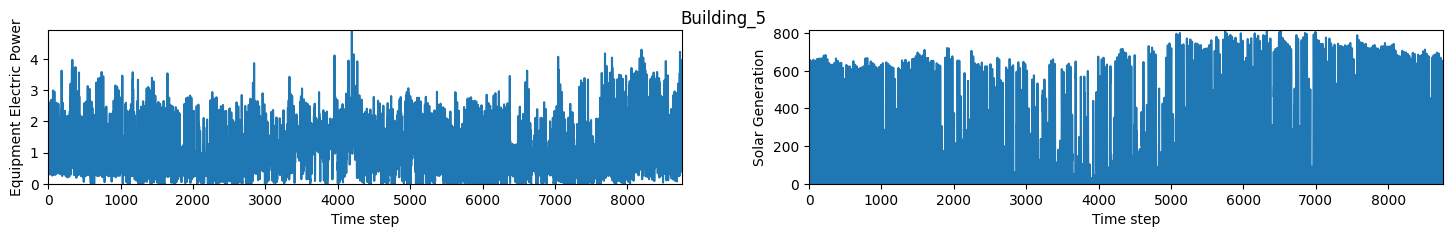

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(18, 2))
x = building_data.index
y1 = building_data['non_shiftable_load']
y2 = building_data['solar_generation']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Equipment Electric Power')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar Generation')
fig.suptitle(building_name)
plt.show()

### Preview Weather File

Other supplemental data in the dataset include [TMY3 weather data from the Los Angeles International Airport weather station](https://energyplus.net/weather-location/north_and_central_america_wmo_region_4/USA/CA/USA_CA_Los.Angeles.Intl.AP.722950_TMY3) that is representative of a typical meteorological year in the Los Angeles International Airport location. All buildings in this dataset reference the same weather file as previewed:

In [8]:
filename = schema['buildings'][building_name]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
display(weather_data.head())

,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_1,outdoor_dry_bulb_temperature_predicted_2,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


The weather file has fields that describe the outdoor dry-bulb temperature, relative humidity, diffuse and direct solar radiation, as well as their 6 hour, 12 hour and 24 hour forecasts. In this dataset, the forecasts are perfect forecasts for example, the 6 hour outdoor dry-bulb temperature forecast at a certain time step is equal to the temperature 6 hours later. The summary statistics for the weather fields are provided below:

In [9]:
display(weather_data.describe(include='all'))

,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_1,outdoor_dry_bulb_temperature_predicted_2,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,16.837454,73.004224,208.282192,201.231507,16.837454,16.837454,16.837454,73.004224,73.004224,73.004224,208.282192,208.282192,208.282192,201.231507,201.231507,201.231507
std,3.564816,16.480251,292.799407,296.193301,3.564816,3.564816,3.564816,16.480251,16.480251,16.480251,292.799407,292.799407,292.799407,296.193301,296.193301,296.193301
min,5.600000,10.000000,0.000000,0.000000,5.600000,5.600000,5.600000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.400000,65.000000,0.000000,0.000000,14.400000,14.400000,14.400000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.200000,76.000000,10.000000,0.000000,17.200000,17.200000,17.200000,76.000000,76.000000,76.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000
75%,19.400000,84.000000,382.000000,424.000000,19.400000,19.400000,19.400000,84.000000,84.000000,84.000000,382.000000,382.000000,382.000000,424.000000,424.000000,424.000000
max,32.200000,100.000000,1017.000000,953.000000,32.200000,32.200000,32.200000,100.000000,100.000000,100.000000,1017.000000,1017.000000,1017.000000,953.000000,953.000000,953.000000


We can also plot this weather data on an axes to understand it better:

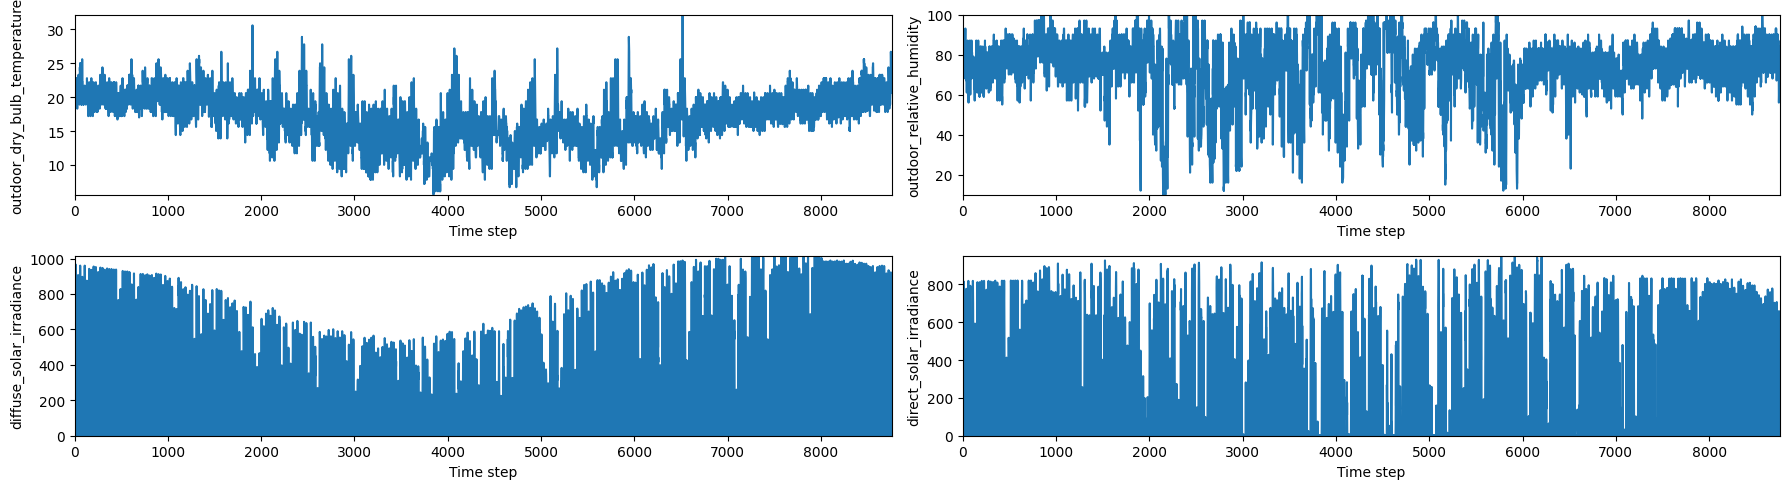

In [10]:
columns = [
    'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity',
    'diffuse_solar_irradiance', 'direct_solar_irradiance'
]
fig, axs = plt.subplots(2, 2, figsize=(18, 5))
x = weather_data.index

for ax, c in zip(fig.axes, columns):
    y = weather_data[c]
    ax.plot(x, y)
    ax.set_xlabel('Time step')
    ax.set_ylabel(c)

fig.align_ylabels()
plt.tight_layout()
plt.show()

### Preview Electricity Price Data

The electricity rate-plan for the dataset is that of the community's utility provider, [Southern California Edison](https://www.sce.com/residential/rates/Time-Of-Use-Residential-Rate-Plans). We adopt their _TOU-D-PRIME_ rate plan summarized in table below, which is designed for customers with residential batteries where electricity is cheapest in the early morning and late at night, and cheaper during off-peak months of October-May. Meanwhile, electricity is cheaper on weekends for peak hours of 4 PM-9 PM in June-September.

Table: Time-Of-Use rate plan ($/kWh).

| | June-September |  | October-May |  |
|---|---|---|---|---|
| **Time** | **Weekday** | **Weekend** | **Weekday** | **Weekend** |
| 8 AM-4 PM | 0.21 | 0.21 | 0.20 | 0.20 |
| 4 PM-9 PM | 0.54 | 0.40 | 0.50 | 0.50 |
| 9 PM-8 AM | 0.21 | 0.21 | 0.20 | 0.20 |

The electricity pricing time series is shown below. It has four fields including perfect forecast of the pricing 6, 12 and 24 hours ahead.

In [11]:
filename = schema['buildings'][building_name]['pricing']
filepath = os.path.join(root_directory, filename)
pricing_data = pd.read_csv(filepath)
display(pricing_data.head())

,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3
0,0.22,0.22,0.22,0.22
1,0.22,0.22,0.22,0.22
2,0.22,0.22,0.22,0.22
3,0.22,0.22,0.22,0.22
4,0.22,0.22,0.54,0.22


### Preview Carbon Intensity Data

Another supplementary data in the `citylearn_challenge_2022_phase_all` dataset is the grid carbon intensity time series descring the CO<sub>2</sub> equivalent of greenhouse gases that are emitted for every unit kWh of energy consumption. This carbon intensity data were provided by EPRI and the time series is shown with its summary statistics below:

In [12]:
filename = schema['buildings'][building_name]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
display(carbon_intensity_data.describe(include='all').T)

,carbon_intensity
0,0.170724
1,0.157319
2,0.154503
3,0.150945
4,0.151820


,count,mean,std,min,25%,50%,75%,max
carbon_intensity,8760.0,0.156531,0.03537,0.070383,0.13108,0.154263,0.178429,0.281796


We also preview the carbon intensity time series on a pair of axes:

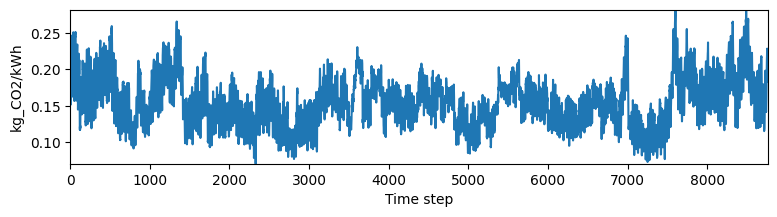

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 2))
x = carbon_intensity_data.index
y = carbon_intensity_data['carbon_intensity']
ax.plot(x, y)
ax.set_xlabel('Time step')
ax.set_ylabel('kg_CO2/kWh')
plt.show()

## Data Preprocessing

Now that we are familiar with the CityLearn `citylearn_challenge_2022_phase_all` dataset, we will make minor changes to its schema that will improve our learning experience in this tutorial. These changes are as follows:

1. We want to use a subset of the buildings so that we are not overwhelmed by the amount of data to analyze during the tutorial 🙂. Since CityLearn is primarily designed for district level energy management and coordination we should use more than 1 building, although a 1-building environment is possible. An considerable building count for tutoring purposes is 2-3.
2. We want to use only a one-week period from the entire one-year period for this tutorial for the same reason of ease of analysis.
3. Instead of using the [full observation space](https://www.citylearn.net/overview/observations.html) that will take a while to explore and converge in RL implementations, we will narrow down the space to only one observations: `hour`. This is not the best set up because the hour alone does not explain the state transitions in the environment that the agent is observing, nevertheless, it will help highlight the strengths and weaknesses of different control algorithms.
4. CityLearn allows for two control strategies: centralized and decentralized as earlier discussed. In this tutorial we will make use of the former.

We will make these modifications directly in the schema. To keep things interesting, the buildings and one-week period will be pseudo-randomly selected but for reproducibility, we will set the random generator seed. This seed can be changed to any value to select another pseudorandom set of buildings and time period. Also, we will provide a method to set the observations we want to use in our simulations so that later down the line, it will be easy to switch and utilize other observations. We will define three functions to help us make these decisions:

In [14]:
def set_schema_buildings(
schema: dict, count: int, seed: int
) -> Tuple[dict, List[str]]:
    """Randomly select number of buildings to set as active in the schema.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    count: int
        Number of buildings to set as active in schema.
    seed: int
        Seed for pseudo-random number generator

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with active buildings set.
    buildings: List[str]
        List of selected buildings.
    """

    assert 1 <= count <= 15, 'count must be between 1 and 15.'

    # set random seed
    np.random.seed(seed)

    # get all building names
    buildings = list(schema['buildings'].keys())

    # remove buildins 12 and 15 as they have pecularities in their data
    # that are not relevant to this tutorial
    buildings_to_exclude = ['Building_12', 'Building_15']

    for b in buildings_to_exclude:
        buildings.remove(b)

    # randomly select specified number of buildings
    buildings = np.random.choice(buildings, size=count, replace=False).tolist()

    # reorder buildings
    building_ids = [int(b.split('_')[-1]) for b in buildings]
    building_ids = sorted(building_ids)
    buildings = [f'Building_{i}' for i in building_ids]

    # update schema to only included selected buildings
    for b in schema['buildings']:
        if b in buildings:
            schema['buildings'][b]['include'] = True
        else:
            schema['buildings'][b]['include'] = False

    return schema, buildings

In [15]:
def set_schema_simulation_period(
    schema: dict, count: int, seed: int
) -> Tuple[dict, int, int]:
    """Randomly select environment simulation start and end time steps
    that cover a specified number of days.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    count: int
        Number of simulation days.
    seed: int
        Seed for pseudo-random number generator.

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with `simulation_start_time_step`
        and `simulation_end_time_step` key-values set.
    simulation_start_time_step: int
        The first time step in schema time series files to
        be read when constructing the environment.
    simulation_end_time_step: int
        The last time step in schema time series files to
        be read when constructing the environment.
    """

    assert 1 <= count <= 365, 'count must be between 1 and 365.'

    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total
    # number of available time steps
    filename = schema['buildings'][building_name]['carbon_intensity']
    filepath = os.path.join(root_directory, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps
    # spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*count)

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(
        simulation_start_time_step_list, size=1
    )[0]
    simulation_end_time_step = simulation_start_time_step + 24*count - 1

    # update schema simulation time steps
    schema['simulation_start_time_step'] = simulation_start_time_step
    schema['simulation_end_time_step'] = simulation_end_time_step

    return schema, simulation_start_time_step, simulation_end_time_step

In [16]:
def set_active_observations(
    schema: dict, active_observations: List[str]
) -> dict:
    """Set the observations that will be part of the environment's
    observation space that is provided to the control agent.

    Parameters
    ----------
    schema: dict
        CityLearn dataset mapping used to construct environment.
    active_observations: List[str]
        Names of observations to set active to be passed to control agent.

    Returns
    -------
    schema: dict
        CityLearn dataset mapping with active observations set.
    """

    active_count = 0

    for o in schema['observations']:
        if o in active_observations:
            schema['observations'][o]['active'] = True
            active_count += 1
        else:
            schema['observations'][o]['active'] = False

    valid_observations = list(schema['observations'].keys())
    assert active_count == len(active_observations),\
        'the provided observations are not all valid observations.'\
          f' Valid observations in CityLearn are: {valid_observations}'

    return schema

### Setting your Random Seed

Begin by setting a random seed. You can set the seed to any integer including your birth day, month or year. Perhaps lucky number 😁. Choose wisely because we will use this random seed moving forward 😉?!?):

In [17]:
RANDOM_SEED = 0
print('Random seed:', RANDOM_SEED)

Random seed: 0


### Setting the Buildings, Time Periods and Observations to use in Simulations from the Schema

Now we can pseudo-randomly select buildings and time periods as well as set the active observations we will use:

In [18]:
# edit next code line to change number of buildings in simulation
BUILDING_COUNT = 2

 # edit next code line to change number of days in simulation
DAY_COUNT = 7

# edit next code line to change active observations in simulation
ACTIVE_OBSERVATIONS = ['hour']

schema, buildings = set_schema_buildings(schema, BUILDING_COUNT, RANDOM_SEED)
schema, simulation_start_time_step, simulation_end_time_step =\
    set_schema_simulation_period(schema, DAY_COUNT, RANDOM_SEED)
schema = set_active_observations(schema, ACTIVE_OBSERVATIONS)

print('Selected buildings:', buildings)
print(
    f'Selected {DAY_COUNT}-day period time steps:',
    (simulation_start_time_step, simulation_end_time_step)
)
print(f'Active observations:', ACTIVE_OBSERVATIONS)

Selected buildings: ['Building_2', 'Building_7']
Selected 7-day period time steps: (7392, 7559)
Active observations: ['hour']


Lastly, the choice between either control strategy is set using the `central_agent` parameter in CityLearn, which is a key-value in the `schema`. We set the `central_agent` key-value in the schema to `True` to define an environment that uses one agent to control many buildings (centralized control strategy):

In [19]:
schema['central_agent'] = True

# Initialize a CityLearn Environment
***

We will now initialize an example instance of the CityLearn environment that we will use in this tutorial. To initialize an environment, all that needs to be done is call the `citylearn.citylearn.CityLearnEnv.__init__` method and parse the `schema` to it:

In [20]:
env = CityLearnEnv(schema)

The `env` object has a number of properties and methods that can be learned about in the [docs](https://www.citylearn.net/api/citylearn.citylearn.html#citylearn.citylearn.CityLearnEnv). We will interact with some of its feature to learn about the current state of the environment:

In [21]:
print('Current time step:', env.time_step)
print('environment number of time steps:', env.time_steps)
print('environment uses central agent:', env.central_agent)
print('Common (shared) observations amogst buildings:', env.shared_observations)
print('Number of buildings:', len(env.buildings))

Current time step: 0
environment number of time steps: 168
environment uses central agent: True
Common (shared) observations amogst buildings: ['month', 'day_type', 'hour', 'daylight_savings_status', 'outdoor_dry_bulb_temperature', 'outdoor_dry_bulb_temperature_predicted_1', 'outdoor_dry_bulb_temperature_predicted_2', 'outdoor_dry_bulb_temperature_predicted_3', 'outdoor_relative_humidity', 'outdoor_relative_humidity_predicted_1', 'outdoor_relative_humidity_predicted_2', 'outdoor_relative_humidity_predicted_3', 'diffuse_solar_irradiance', 'diffuse_solar_irradiance_predicted_1', 'diffuse_solar_irradiance_predicted_2', 'diffuse_solar_irradiance_predicted_3', 'direct_solar_irradiance', 'direct_solar_irradiance_predicted_1', 'direct_solar_irradiance_predicted_2', 'direct_solar_irradiance_predicted_3', 'carbon_intensity', 'electricity_pricing', 'electricity_pricing_predicted_1', 'electricity_pricing_predicted_2', 'electricity_pricing_predicted_3']
Number of buildings: 2


The buildings in the environment are objects of the `citylearn.building.Building` class and the class properties and methods are detailed in the [docs](https://www.citylearn.net/api/citylearn.building.html#citylearn.building.Building). We will interact with some of these features:

In [22]:
# electrical storage
print('Electrical storage capacity:', {
    b.name: b.electrical_storage.capacity for b in env.buildings
})
print('Electrical storage nominal power:', {
    b.name: b.electrical_storage.nominal_power for b in env.buildings
})
print('Electrical storage capacity history:', {
    b.name: b.electrical_storage.capacity_history for b in env.buildings
})
print('Electrical storage loss_coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print('Electrical storage initial_soc:', {
    b.name: b.electrical_storage.initial_soc for b in env.buildings
})
print('Electrical storage soc:', {
    b.name: b.electrical_storage.soc for b in env.buildings
})
print('Electrical storage efficiency:', {
    b.name: b.electrical_storage.efficiency for b in env.buildings
})
print('Electrical storage efficiency history:', {
    b.name: b.electrical_storage.efficiency_history for b in env.buildings
})
print('Electrical storage electricity consumption:', {
    b.name: b.electrical_storage.electricity_consumption
    for b in env.buildings
})
print('Electrical storage capacity loss coefficient:', {
    b.name: b.electrical_storage.loss_coefficient for b in env.buildings
})
print()
# pv
print('PV nominal power:', {
    b.name: b.pv.nominal_power for b in env.buildings
})
print()

# active observations and actions
with pd.option_context(
    'display.max_rows', None,
    'display.max_columns', None,
    'display.width', None
):
    print('Active observations:')
    display(pd.DataFrame([
        {**{'building':b.name}, **b.observation_metadata}
        for b in env.buildings
    ]))
    print()
    print('Active actions:')
    display(pd.DataFrame([
        {**{'building':b.name}, **b.action_metadata}
        for b in env.buildings
    ]))

Electrical storage capacity: {'Building_2': 6.4, 'Building_7': 6.4}
Electrical storage nominal power: {'Building_2': 5.0, 'Building_7': 5.0}
Electrical storage capacity history: {'Building_2': [6.4], 'Building_7': [6.4]}
Electrical storage loss_coefficient: {'Building_2': 0.0, 'Building_7': 0.0}
Electrical storage initial_soc: {'Building_2': 0.0, 'Building_7': 0.0}
Electrical storage soc: {'Building_2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

,building,month,day_type,hour,daylight_savings_status,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_1,outdoor_dry_bulb_temperature_predicted_2,outdoor_dry_bulb_temperature_predicted_3,outdoor_relative_humidity,outdoor_relative_humidity_predicted_1,outdoor_relative_humidity_predicted_2,outdoor_relative_humidity_predicted_3,diffuse_solar_irradiance,diffuse_solar_irradiance_predicted_1,diffuse_solar_irradiance_predicted_2,diffuse_solar_irradiance_predicted_3,direct_solar_irradiance,direct_solar_irradiance_predicted_1,direct_solar_irradiance_predicted_2,direct_solar_irradiance_predicted_3,carbon_intensity,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,solar_generation,cooling_storage_soc,heating_storage_soc,dhw_storage_soc,electrical_storage_soc,net_electricity_consumption,electricity_pricing,electricity_pricing_predicted_1,electricity_pricing_predicted_2,electricity_pricing_predicted_3,power_outage,hvac_mode,comfort_band
0,Building_2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Building_7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



Active actions:


,building,cooling_storage,heating_storage,dhw_storage,electrical_storage
0,Building_2,False,False,False,True
1,Building_7,False,False,False,True


# Key Performance Indicators for Evaluation
---

We evaluate the control agents' performance using six key performance indicators (KPIs) that are to be minimized: electricity consumption, cost, carbon emissions, average daily peak, ramping, and (1 - load factor). average daily peak, ramping and (1 - load factor) are district-level KPIs that are calculated using the aggregated district-level hourly net electricity consumption (kWh), $E_h^{\textrm{district}}$. electricity consumption, cost, and carbon emissions are building-level KPIs that are calculated using the building-level hourly net electricity consumption (kWh), $E_h^{\textrm{building}}$, and are reported at the grid level as the average of the building-level values.

Electricity consumption is defined as the sum of imported electricity $E_h^{\textrm{building}}$ as the objective is to minimize the energy consumed but not profit from the excess generation.

$$
    \textrm{electricity consumption} = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \right)}
$$

Cost is defined as the sum of building-level imported electricity cost, $E_h^{\textrm{building}} \times T_h$ (\$), where $T_h$ is the electricity rate at hour $h$.

$$
    \textrm{cost} = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \times T_h \right )}
$$

Carbon emissions is the sum of building-level carbon emissions (kg<sub>CO<sub>2</sub>e</sub>), $E_h^{\textrm{building}} \times O_h$, where $O_h$ is the carbon intensity (kg<sub>CO<sub>2</sub>e</sub>/kWh) at hour $h$.

$$
    \textrm{carbon emissions} = \sum_{h=0}^{n-1}{\textrm{max} \left (0,E_h^{\textrm{building}} \times O_h \right )}
$$

Average daily peak, is defined as the mean of the daily $E_h^{\textrm{district}}$ peak where $d$ is the day index and $n$ is the total number of days.

$$
    \textrm{average daily peak} = \frac{
        {\sum}_{d=0}^{n - 1} {\sum}_{h=0}^{23} {\textrm{max} \left (E_{24d + h}^{\textrm{district}}, \dots, E_{24d + 23}^{\textrm{district}} \right)}
    }{n}
$$

Ramping is defined as the absolute difference of consecutive $E_h^{\textrm{district}}$. It represents the smoothness of the district’s load profile where low ramping means there is gradual increase in grid load even after self-generation becomes unavailable in the evening and early morning. High ramping means abrupt change in grid load that may lead to unscheduled strain on grid infrastructure and blackouts as a result of supply deficit.

$$
    \textrm{ramping} = \sum_{h=0}^{n-1}  \lvert E_{h}^{\textrm{district}} - E_{h - 1}^{\textrm{district}} \rvert
$$

Load factor is defined as the average ratio of monthly average and peak $E_{h}^{\textrm{district}}$ where $m$ is the month index, $d$ is the number of days in a month and $n$ is the number of months. load factor represents the efficiency of electricity consumption and is bounded between 0 (very inefficient) and 1 (highly efficient) thus, the goal is to maximize the load factor or in the same fashion as the other KPIs, minimize (1 - load factor).

$$
    \textrm{1 - load factor}  = \Big(
        \sum_{m=0}^{n - 1} 1 - \frac{
            \left (
                \sum_{h=0}^{d - 1} E_{d \cdot m + h}^{\textrm{district}}
            \right ) \div d
        }{
            \textrm{max} \left (E_{d \cdot m}^{\textrm{district}}, \dots, E_{d \cdot m + d - 1}^{\textrm{district}} \right )
    }\Big) \div n
$$

For the remainder of the paper, the KPIs are reported as normalized values with respect to the baseline outcome where the baseline outcome is when buildings are not equipped with batteries i.e., no control.

$$
    \textrm{KPI} = \frac{{\textrm{KPI}_{control}}}{\textrm{KPI}_{baseline (no\ battery)}}
$$

# Convenience Functions to Display Simulation Results
---

CityLearn itself is able to report the key performance indicators (KPIs) during simulation using the `citylearn.citylearn.CityLearnEnv.evaluate` (see [docs](https://www.citylearn.net/api/citylearn.citylearn.html#citylearn.citylearn.CityLearnEnv.evaluate)) method however, let us go ahead and define some convenience functions to help us report the KPIs illustratively. The first function helps us calculate and return the KPIs in a table:

In [84]:
def get_kpis(env: CityLearnEnv) -> pd.DataFrame:
    """Returns evaluation KPIs.

    Electricity cost and carbon emissions KPIs are provided
    at the building-level and average district-level. Average daily peak,
    ramping and (1 - load factor) KPIs are provided at the district level.

    Parameters
    ----------
    env: CityLearnEnv
        CityLearn environment instance.

    Returns
    -------
    kpis: pd.DataFrame
        KPI table.
    """

    kpis = env.unwrapped.evaluate()

    # names of KPIs to retrieve from evaluate function
    kpi_names = {
        'cost_total': 'Cost',
        'carbon_emissions_total': 'Emissions',
        'daily_peak_average': 'Avg. daily peak',
        'ramping_average': 'Ramping',
        'monthly_one_minus_load_factor_average': '1 - load factor'
    }
    kpis = kpis[
        (kpis['cost_function'].isin(kpi_names))
    ].dropna()
    kpis['cost_function'] = kpis['cost_function'].map(lambda x: kpi_names[x])

    # round up the values to 2 decimal places for readability
    kpis['value'] = kpis['value'].round(2)

    # rename the column that defines the KPIs
    kpis = kpis.rename(columns={'cost_function': 'kpi'})

    return kpis

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where a plotting function is defined.

The next function, `plot_building_kpis` plots the KPIs at the building level in bar charts and can be used to compare different control strategies by providing it with a dictionary that maps a control agent name to the environment the agent acted on:

In [85]:
def plot_building_kpis(envs: dict[str, CityLearnEnv]) -> plt.Figure:
    """Plots electricity consumption, cost and carbon emissions
    at the building-level for different control agents in bar charts.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='building'].copy()
        kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1]
        kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
        kpis['env_id'] = k
        kpis_list.append(kpis)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    kpi_names= kpis['kpi'].unique()
    column_count_limit = 3
    row_count = math.ceil(len(kpi_names)/column_count_limit)
    column_count = min(column_count_limit, len(kpi_names))
    building_count = len(kpis['name'].unique())
    env_count = len(envs)
    figsize = (3.0*column_count, 0.3*env_count*building_count*row_count)
    fig, _ = plt.subplots(
        row_count, column_count, figsize=figsize, sharey=True
    )

    for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
        sns.barplot(x='value', y='name', data=k_data, hue='env_id', ax=ax)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_title(k)

        for j, _ in enumerate(envs):
            ax.bar_label(ax.containers[j], fmt='%.2f')

        if i == len(kpi_names) - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)

        for s in ['right','top']:
            ax.spines[s].set_visible(False)

    return fig

In [24]:
# def plot_building_kpis(envs: Mapping[str, CityLearnEnv]) -> plt.Figure:
#     """Plots electricity consumption, cost and carbon emissions
#     at the building-level for different control agents in bar charts.

#     Parameters
#     ----------
#     envs: Mapping[str, CityLearnEnv]
#         Mapping of user-defined control agent names to environments
#         the agents have been used to control.

#     Returns
#     -------
#     fig: plt.Figure
#         Figure containing plotted axes.
#     """

#     kpis_list = []

#     # for k, v in envs.items():
#     #     kpis = get_kpis(v)
#     #     kpis = kpis[kpis['level']=='building'].copy()
#     #     kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1]
#     #     kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
#     #     kpis['env_id'] = k
#     #     kpis_list.append(kpis)
#     for k, v in envs.items():
#         kpis = get_kpis(v)
#         kpis = kpis[kpis['level'] == 'building'].copy()   # building 레벨만
#         # ----------- ★ 여기부터 수정 ★ -----------------
#         # 이름 끝의 숫자(빌딩 id)만 뽑고, 없는 경우는 NaN
#         kpis['building_id'] = (
#             kpis['name']
#             .str.extract(r'(\d+)$')        # 끝에 붙은 숫자만 추출
#             .astype(float)                 # NaN 처리를 위해 float → 나중에 str
#         )
#         kpis = kpis.dropna(subset=['building_id'])        # District 등 제거
#         kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
#         # ----------- ★ 수정 끝 ★ -----------------------
#         kpis['env_id'] = k
#         kpis_list.append(kpis)

#     if not kpis_list:        # 안전장치
#         return

#     kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
#     kpi_names= kpis['kpi'].unique()
#     column_count_limit = 3
#     row_count = math.ceil(len(kpi_names)/column_count_limit)
#     column_count = min(column_count_limit, len(kpi_names))
#     building_count = len(kpis['name'].unique())
#     env_count = len(envs)
#     figsize = (3.0*column_count, 0.3*env_count*building_count*row_count)
#     fig, _ = plt.subplots(
#         row_count, column_count, figsize=figsize, sharey=True
#     )

#     for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
#         sns.barplot(x='value', y='name', data=k_data, hue='env_id', ax=ax)
#         ax.axvline(1.0, color='black', linestyle='--', label='Baseline')
#         ax.set_xlabel(None)
#         ax.set_ylabel(None)
#         ax.set_title(k)

#         if i == len(kpi_names) - 1:
#             ax.legend(
#                 loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0
#             )
#         else:
#             ax.legend().set_visible(False)

#         for s in ['right','top']:
#             ax.spines[s].set_visible(False)

#         for p in ax.patches:
#             ax.text(
#                 p.get_x() + p.get_width(),
#                 p.get_y() + p.get_height()/2.0,
#                 p.get_width(), ha='left', va='center'
#             )

#     plt.tight_layout()
#     return fig

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where a plotting function is defined.

The `plot_district_kpis` function plots the KPIs at the district level in a bar chart and can be used to compare different control agents:

In [86]:
def plot_district_kpis(envs: dict[str, CityLearnEnv]) -> plt.Figure:
    """Plots electricity consumption, cost, carbon emissions,
    average daily peak, ramping and (1 - load factor) at the
    district-level for different control agents in a bar chart.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='district'].copy()
        kpis['env_id'] = k
        kpis_list.append(kpis)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    row_count = 1
    column_count = 1
    env_count = len(envs)
    kpi_count = len(kpis['kpi'].unique())
    figsize = (6.0*column_count, 0.225*env_count*kpi_count*row_count)
    fig, ax = plt.subplots(row_count, column_count, figsize=figsize)
    sns.barplot(x='value', y='kpi', data=kpis, hue='env_id', ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    for j, _ in enumerate(envs):
        ax.bar_label(ax.containers[j], fmt='%.2f')

    for s in ['right','top']:
        ax.spines[s].set_visible(False)

    ax.legend(loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0)
    plt.tight_layout()

    return fig

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where a plotting function is defined.

The `plot_building_load_profiles` function plots the building-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control agents:

In [87]:
def plot_building_load_profiles(
    envs: dict[str, CityLearnEnv], daily_average: bool = None
) -> plt.Figure:
    """Plots building-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    daily_average: bool, default: False
        Whether to plot the daily average load profile.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    daily_average = False if daily_average is None else daily_average
    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (4.0*column_count, 1.75*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = v.unwrapped.buildings[i].net_electricity_consumption
            y = np.reshape(y, (-1, 24)).mean(axis=0) if daily_average else y
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_ylabel('kWh')

        if daily_average:
            ax.set_xlabel('Hour')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

        else:
            ax.set_xlabel('Time step')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where a plotting function is defined.

The `plot_district_load_profiles` function plots the district-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control agents.

In [88]:
def plot_district_load_profiles(
    envs: dict[str, CityLearnEnv], daily_average: bool = None
) -> plt.Figure:
    """Plots district-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    daily_average: bool, default: False
        Whether to plot the daily average load profile.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    daily_average = False if daily_average is None else daily_average
    figsize = (5.0, 1.5)
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    for k, v in envs.items():
        y = v.unwrapped.net_electricity_consumption
        y = np.reshape(y, (-1, 24)).mean(axis=0) if daily_average else y
        x = range(len(y))
        ax.plot(x, y, label=k)

    ax.set_ylabel('kWh')

    if daily_average:
        ax.set_xlabel('Hour')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

    else:
        ax.set_xlabel('Time step')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)

    plt.tight_layout()
    return fig

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where a plotting function is defined.

The `plot_battery_soc_profiles` function plots the building-level battery state of charge (SoC) profiles can also be used to compare different control agents:

In [89]:
def plot_battery_soc_profiles(envs: dict[str, CityLearnEnv]) -> plt.Figure:
    """Plots building-level battery SoC profiles fro different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (4.0*column_count, 1.75*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = np.array(v.unwrapped.buildings[i].electrical_storage.soc)
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('SoC')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.set_ylim(0.0, 1.0)

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where a plotting function is defined.

The last function, `plot_simulation_summary` is a convenience function used to plot all figures in one go:

In [90]:
def plot_simulation_summary(envs: dict[str, CityLearnEnv]):
    """Plots KPIs, load and battery SoC profiles for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    """

    print('#'*8 + ' BUILDING-LEVEL ' + '#'*8)
    print('Building-level KPIs:')
    _ = plot_building_kpis(envs)
    plt.show()

    print('Building-level simulation period load profiles:')
    _ = plot_building_load_profiles(envs)
    plt.show()

    print('Building-level daily-average load profiles:')
    _ = plot_building_load_profiles(envs, daily_average=True)
    plt.show()

    print('Battery SoC profiles:')
    _ = plot_battery_soc_profiles(envs)
    plt.show()

    print('#'*8 + ' DISTRICT-LEVEL ' + '#'*8)
    print('District-level KPIs:')
    _ = plot_district_kpis(envs)
    plt.show()

    print('District-level simulation period load profiles:')
    _ = plot_district_load_profiles(envs)
    plt.show()

    print('District-level daily-average load profiles:')
    _ = plot_district_load_profiles(envs, daily_average=True)
    plt.show()

# Build your Custom Rule-Based Controller
---

With our convenience functions defined, we are ready to start solving our earlier described control problem.

We will start simple with a rule-based control (RBC) agent that you will build yourself_! RBC is a popular control strategy that is used in most systems e.g. HVAC, batteries, etc because of their level of simplicity. They are  best described as a set of rules expressed as if-else statements and conditions that guide their decision making. An example of such statement is `if outdoor dry-bulb temperature is 20 degrees Celcius and hour 10 PM, charge battery with 5% of capacity`. Now the actual implementation of this statement is open-ended as a designer can choose to program it using any programming language e.g. Python (as used in CityLearn) or a proprietary language that the battery manufacturer uses. Nevertheless, at a high-level, it simplifies to a set of statements and conditions that are easily understood and mappable (think decision tree in supervised learning).

The RBC you will be designing here, is a set of if-else statements that use the `hour` observation to determine the amount of energy to charge or discharge a battery. Remember we are using a centralized control strategy thus, the if-else statements you define will apply to all batteries in all buildings.

We will use widgets for an interactive RBC tuning experience. You will design a custom RBC that inherits from an existing RBC in CityLearn called the [HourRBC](https://www.citylearn.net/api/citylearn.agents.rbc.html#citylearn.agents.rbc.HourRBC). Inheritance, allows us to copy existing properties and methods in the parent class, `HourRBC`, into our custom class. The `HourRBC` class allows one to define a custom `action_map` using the `hour` as the if condition and the battery capacity proportion as the action where negative proportions imply discharging and positive proportions imply charging.

We begin by initializing the environment we will work with:

In [30]:
rbc_env = CityLearnEnv(schema)

Now let us define the custom RBC class we will use. All agent classes in CityLearn inherit from the [citylearn.agents.base.Agent](https://www.citylearn.net/api/citylearn.agents.base.html#citylearn.agents.base.Agent) class. This base class has 4 methods that are important to note when defining a new class that inherits from it. namely:

1. `__init__` - Used to initialize a new agent with a `citylearn.citylearn.CityLearnEnv` object.
2. `learn`: Used to train the initialized object on its environment object.
3. `predict`: Used to select actions at each simulation timestep using a defined policy that may be rule-based, reinforcement learning-based or model predictive control-based. The base class selects random actions.
4. `update`: Used to update replay buffers, networks and policies at least every timestep. The base class does not perform any updates.
5. `next_time_step`: Used to proceed to the next timestep and is called inside `predict`. This function is where class values or custom values that need to collected or updated are best manipulated.

In our case with the RBC, we want to include an `action_map` class instance that is a `dict` type. This `action_map` has `int` keys that define hours and `float` values that define charge/discharge action for the hour key that maps them.

We also want to include a loader variable to help us visualize the simulation progress. The loader is an `IntProgress` ipywidgets object. We will update the loader's value each timestep the `next_time_step` method is called in the RBC class.

The RBC class is defined below:

In [31]:
class CustomRBC(HourRBC):
   def __init__(
       self, env: CityLearnEnv, action_map: Mapping[int, float] = None,
       loader: IntProgress = None
    ):
      r"""Initialize CustomRBC.

      Parameters
      ----------
      env: Mapping[str, CityLearnEnv]
         CityLearn environment instance.
      action_map: Mapping[int, float]
         Mapping of hour to control action.
      loader: IntProgress
         Progress bar.
      """

      super().__init__(env=env, action_map=action_map)
      self.loader = loader

   def next_time_step(self):
      r"""Advance to next `time_step`."""

      super().next_time_step()

      if self.loader is not None:
         self.loader.value += 1
      else:
         pass

We can now initialize the RBC by setting all actions to 0 for every hour:

In [32]:
action_map = {i: 0.0 for i in range(1, 25)}
rbc_model = CustomRBC(env=rbc_env, action_map=action_map)
print('default RBC action map:', action_map)

default RBC action map: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0}


We also need to define a convenience function to set and return a loader i.e. a progress bar as we will use this visualization a number of times to track our learning progress:

In [33]:
def get_loader(**kwargs):
    """Returns a progress bar"""

    kwargs = {
        'value': 0,
        'min': 0,
        'max': 10,
        'description': 'Simulating:',
        'bar_style': '',
        'style': {'bar_color': 'maroon'},
        'orientation': 'horizontal',
        **kwargs
    }
    return IntProgress(**kwargs)

With our custom RBC now defined, we can set up the interactive widgets.

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where the widget is defined. Instead wait for the widgets to load and interact with it using the instructions.

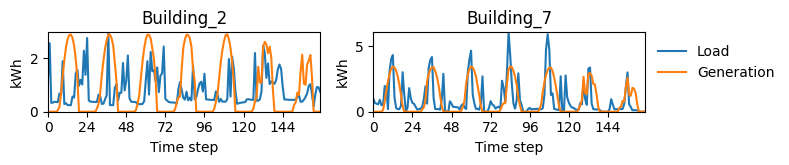

HTML(value='\n<h1>Custom RBC Tuner</h1>\n<p>Use this interactive widget to tune your custom RBC!\nReference th…

IntProgress(value=0, description='Simulating', max=10354, style=ProgressStyle(bar_color='maroon'))

######## BUILDING-LEVEL ########
Building-level KPIs:


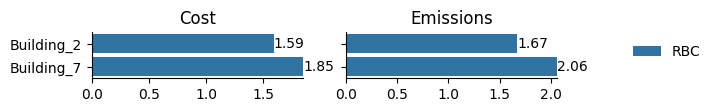

Building-level simulation period load profiles:


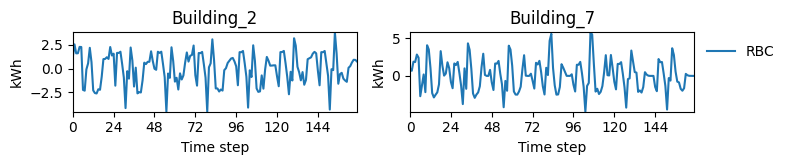

Building-level daily-average load profiles:


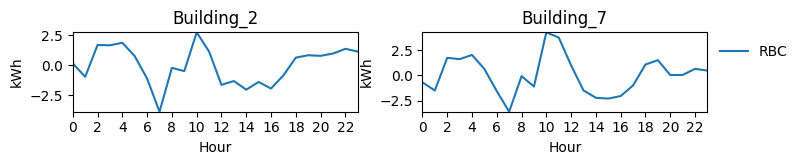

Battery SoC profiles:


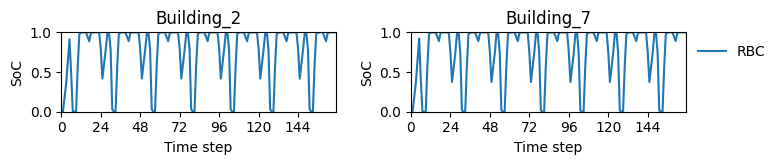

######## DISTRICT-LEVEL ########
District-level KPIs:


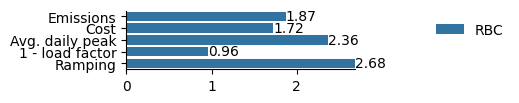

District-level simulation period load profiles:


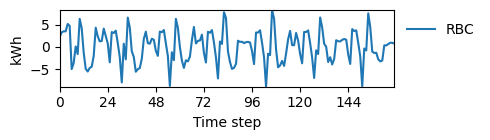

District-level daily-average load profiles:


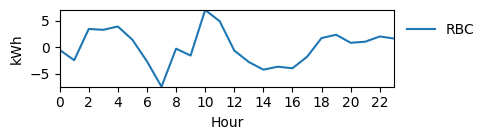

In [ ]:
action_step = 0.05
hour_step = 2
hours = list(range(1, 25, hour_step))
default_loader_description = 'Waiting'
questions = """
<h1>Custom RBC Tuner</h1>
<p>Use this interactive widget to tune your custom RBC!
Reference the building load profiles above and the questions below when
deciding on how to charge/discharge your rule-based controlled batteries.</p>

<h3>Some considerations when tuning your custom RBC:</h3>
<ul>
    <li>What happens when actions for all hours are set to 0?</li>
    <li>How can we set the RBC so that it takes advantage
    of solar generation?</li>
    <li>Can you spot the duck curve?</li>
    <li>What settings work best for a specific building?</li>
    <li>What settings work best for the entire district?</li>
    <li>Can you tune the RBC to target improvements in any one of
    the evaluation KPIs?</li>
    <li>What challenges can you identify from this RBC tuning process?</li>
</ul>

<h3>Interact with the controls to tune your RBC:</h3>

<p>Use the sliders to set the hourly charge and discharge rate
of the batteries. Positive values indicate charging
and negative values indicate discharging the batteries</p>
"""
html_ui = HTML(value=questions, placeholder='Questions')
sliders = [FloatSlider(
    value=0.0,
    min=-1.0,
    max=1.0,
    step=action_step,
    description=f'Hr: {h}-{h + hour_step - 1}',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.2f',
) for h in hours]
reset_button = Button(
    description='Reset', disabled=False, button_style='info',
    tooltip='Set all hour actions to 0.0', icon=''
)
random_button = Button(
    description='Random', disabled=False, button_style='warning',
    tooltip='Select random hour actions', icon=''
)
simulate_button = Button(
    description='Simulate', disabled=False, button_style='success',
    tooltip='Run simulation', icon='check'
)
sliders_ui = HBox(sliders)
buttons_ui = HBox([reset_button, random_button, simulate_button])

# run simulation so that the environment has results
# even if user does not interact with widgets
sac_episodes = 1
rbc_model.learn(episodes=sac_episodes)

loader = get_loader(description=default_loader_description)

def plot_building_guide(env):
    """Plots building load and generation profiles."""

    column_count_limit = 4
    building_count = len(env.buildings)
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (4.0*column_count, 1.75*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, (ax, b) in enumerate(zip(fig.axes, env.buildings)):
        y1 = b.energy_simulation.non_shiftable_load
        y2 = b.pv.get_generation(b.energy_simulation.solar_generation)
        x = range(len(y1))
        ax.plot(x, y1, label='Load')
        ax.plot(x, y2, label='Generation')
        ax.set_title(b.name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('kWh')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)

    plt.tight_layout()
    return fig

def on_reset_button_clicked(b):
    """Zeros sliders and loader values."""

    loader.value = 0
    loader.description = default_loader_description

    for s in sliders:
        s.value = 0.0

def on_random_button_clicked(b):
    """Zeros loader value and sets sliders to random values."""

    loader.value = 0
    loader.description = default_loader_description
    options = np.arange(-1.0, 1.0, action_step)

    for s in sliders:
        s.value = round(random.choice(options), 2)

def on_simulate_button_clicked(b):
    """Runs RBC simulation using selected action map."""

    loader.description = 'Simulating'
    loader.value = 0
    clear_output(wait=False)

    # plot building profiles
    _ = plot_building_guide(rbc_env)
    plt.show()

    display(html_ui, sliders_ui, buttons_ui, loader)
    reset_button.disabled = True
    random_button.disabled = True
    simulate_button.disabled = True

    for s in sliders:
        s.disabled = True

    action_map = {}

    for h, s in zip(hours, sliders):
        for i in range(hour_step):
            action_map[h + i] = s.value

    loader.max = rbc_env.time_steps*sac_episodes
    rbc_model.action_map = action_map
    rbc_model.learn(episodes=sac_episodes)

    loader.description = 'Finished'
    plot_simulation_summary({'RBC': rbc_env})

    reset_button.disabled = False
    random_button.disabled = False
    simulate_button.disabled = False

    for s in sliders:
        s.disabled = False

reset_button.on_click(on_reset_button_clicked)
random_button.on_click(on_random_button_clicked)
simulate_button.on_click(on_simulate_button_clicked)

# plot building profiles
_ = plot_building_guide(rbc_env)
plt.show()

# preview of building load profile
display(html_ui, sliders_ui, buttons_ui, loader)

# An Introduction to Tabular Q-Learning Algorithm as an Adaptive Controller
---

Tuning your RBC must have revealed that it is a cumbersome and labor intensive process, especially as the number of buildings, time period and variance in load profiles increase. What we will be ideal is an adaptive controller that can adjust to different occupant preferences and behaviors in each building that influence load profiles and adjust to different weather conditions that affect the seasonal variance in load profiles.

Moreover, we want a controller that is able to learn with little to no knowledge about the environment model it is controlling unlike the RBC tuning process where you probably chose your charge and discharge proportion by visually inspecting the building load and generation profiles. Instead, we want a controller that can learn those patterns in a data-driven fashion.

In [45]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

In [46]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline

## Q-Learning Background
[Tabular Q-Learning](https://link.springer.com/article/10.1007/BF00992698) is a popular model-free reinforcement learning technique due to its simplicity. In simple tasks with small finite state sets, and discrete actions, all transitions can be represented using a table, hence the name Tabular Q-Learning, which stores the state-action values, i.e., Q-values.

After taking an action $a$, given a state $s$, and observing the immediate reward $r$ for taking $a$ at $s$, learning is achieved through updating $Q(s, a)$ ([Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation)) as:

$$
Q(s, a) = Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$$

where $Q(s, a)$ is the Q-value for taking action $a$ in state $s$, $\alpha ∈ [0, 1]$ is the learning rate, which explicitly defines to what degree new knowledge overrides old knowledge: for $\alpha = 0$, no learning happens, while for $\alpha = 1$, all prior knowledge is lost. $\gamma$ is the discount factor which allow to balance between an agent that considers only immediate rewards ($\gamma$ = 0) and one that strives towards long term rewards ($\gamma$ = 1). $\max_{a'} Q(s', a')$ is the maximum Q-value for all actions $a'$ in the next state $s'$ that is reached after taking action $a$ in state $s$.

In other words, the optimal policy, $\pi$, results from taking those actions $a$ that maximize the respective Q-values in each state, $s$. In order for the algorithm to converge to the optimal policy, the requirement is that each state-action pair $(s, a)$ be visited infinitely many times, such that the Q-values have converged.

### Algorithm

The general Q-Learning algorithm is as follows:

> 1. Initialize the Q-table for all state-action pairs.
> 2. Set the learning rate $\alpha$ ($0 < \alpha < 1$) and the discount factor $\gamma$ ($0 < \gamma < 1$).
> 3. Repeat the following steps for each episode:
>     - Observe the initial state $s$.
>     - Choose an action $a$ based on the epsilon-greedy policy (a random action is chosen with probability epsilon, $\epsilon$ and the action with the highest Q-value is chosen with probability $1 - \epsilon$).
>     - Take the action $a$ and observe the next state $s'$ and the reward $r$.
>     - Update the Q-value of the state-action pair $(s,a)$ using the Bellman equation.
>     - Set $s = s'$.
> 4. Repeat step 3 for a large number of episodes or until convergence is reached.

### Action Selection

In Q-learning, the process of accumulating knowledge happens through the trade-off between exploiting known, high-reward, actions, and exploring other, unknown, actions that have not been executed yet under that state. The $\epsilon$-greedy approach which we use here, selects a random action with probability epsilon, $\epsilon$ (exploration), and the action with the highest expected return with probability $1 - \epsilon$ (exploitation). This balancing allows the agent to avoid local minima (exploration), while striving towards convergence (exploitation). In practice, $\epsilon$ is set relatively large in the beginning of the learning process, and then reduced progressively. The choice of the initial value and the reduction strategy is domain specific and task of the designer.

## CityLearn Tabular Q-Learning Implementation

CityLearn has a Tabular Q-learning implementation in its `citylearn.agents.q_learning.TabularQLearning` class (see [docs](https://www.citylearn.net/api/citylearn.agents.base.html#citylearn.agents.q_learning.TabularQLearning)). This Q-Learning implementation is inspired by the [BOPTEST Tutorial](https://colab.research.google.com/drive/1WeA_3PQeySba0MMRRte_oZTF7ptlP_Ra#scrollTo=9U81QUVcUfoW&line=17&uniqifier=1) but follows the general algorithm in the literature that we have described. However, a caveat of making use of this agent is that it requires discrete observations and actions in order to update the Q-Table whereas the default CityLearn environment provides continuous observations and actions.

CityLearn provides an environment wrapper, `TabularQLearningWrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.DiscreteSpaceWrapper)) used to discretize observations and actions before passing to an agent. All we need to do is define the number of bins to use to discretize the observations and actions using the wrapper's `observation_bin_sizes` and `action_bin_sizes` initialization variables.

We begin by initializing a new environment:

In [47]:
tql_env = CityLearnEnv(schema)

We will discretize the hour into 24 bins and the action into 12 bins. Hour is an observation shared by all buildings thus, its values are the same in all buildings at each time step. For this reason, one of the dimensions of our Q-Table will equal hour bin count. The action space for controlling the batteries has the same size as number of buildings thus when discretized, the other Q-Table dimension will equal the `electrical_storage` action raised to the power of building count:

In [48]:
# define active observations and actions and their bin sizes
observation_bins = {'hour': 24}
action_bins = {'electrical_storage': 12}

# initialize list of bin sizes where each building
# has a dictionary in the list definining its bin sizes
observation_bin_sizes = []
action_bin_sizes = []

for b in tql_env.buildings:
    # add a bin size definition for the buildings
    observation_bin_sizes.append(observation_bins)
    action_bin_sizes.append(action_bins)

Can you think of a way to choose more appropriate bin sizes? How does the choice of bin size affect the learning process?

Now we wrap the environment to make sure we are exchanging discrete observations and actions between the environment and agent:

In [49]:
tql_env = TabularQLearningWrapper(
    tql_env.unwrapped,
    observation_bin_sizes=observation_bin_sizes,
    action_bin_sizes=action_bin_sizes
)

We can now go ahead to initialize our Q Learner. We will modify the CityLearn `TabularQLearning` class like we did the `HourRBC` so that we are able to visually track the learning process as well as keep tabs on its cummulative reward as training episode go by. We also provide a `random_seed` instance variable that we set to the random seed you defined earlier. This random seed will ensure that each time this notebook is run, the epsilon-greedy action selections are reproducible. The modifications to the `TabularQLearning` class are done below:

In [50]:
class CustomTabularQLearning(TabularQLearning):
    def __init__(
        self, env: CityLearnEnv, loader: IntProgress,
        random_seed: int = None, **kwargs
    ):
        r"""Initialize CustomRBC.

        Parameters
        ----------
        env: Mapping[str, CityLearnEnv]
            CityLearn environment instance.
        loader: IntProgress
            Progress bar.
        random_seed: int
            Random number generator reprocucibility seed for
            eqsilon-greedy action selection.
        kwargs: dict
            Parent class hyperparameters
        """

        super().__init__(env=env, random_seed=random_seed, **kwargs)
        self.loader = loader
        self.reward_history = []

    def next_time_step(self):
        if self.env.time_step == 0:
            self.reward_history.append(0)

        else:
            self.reward_history[-1] += sum(self.env.rewards[-1])

        self.loader.value += 1
        super().next_time_step()

With our Tabular Q-Learning agent set up, it is time to train it on our environment. We will use the following hyperparameters:

- `epsilon` ($\epsilon$) = 1.0
- `minimum_epsilon` ($\epsilon_{\textrm{min}}$) = 0.01
- `epsilon_decay` ($\epsilon_{\textrm{decay}}$) = 0.0001
- `discount_factor` ($\gamma$) = 0.99
- `learning_rate` ($\alpha$) = 0.005

The agent is trained for $\frac{m \times n \times i}{t}$ episodes where $m$ and $n$ are the observation and action space sizes respectively, $i$ is an arbitrary integer and t is the number of time steps in one episode. That way, we increase the probability that we at least visit each state-action combination once.

In [51]:
# ----------------- CALCULATE NUMBER OF TRAINING EPISODES -----------------
i = 3
m = tql_env.observation_space[0].n
n = tql_env.action_space[0].n
t = tql_env.time_steps - 1
tql_episodes = m*n*i/t
tql_episodes = int(tql_episodes)
print('Q-Table dimension:', (m, n))
print('Number of episodes to train:', tql_episodes)

# ------------------------------- SET LOADER ------------------------------
loader = get_loader(max=tql_episodes*t)
display(loader)

# ----------------------- SET MODEL HYPERPARAMETERS -----------------------
tql_kwargs = {
    'epsilon': 1.0,
    'minimum_epsilon': 0.01,
    'epsilon_decay': 0.0001,
    'learning_rate': 0.005,
    'discount_factor': 0.99,
}

# ----------------------- INITIALIZE AND TRAIN MODEL ----------------------
tql_model = CustomTabularQLearning(
    env=tql_env,
    loader=loader,
    random_seed=RANDOM_SEED,
    **tql_kwargs
)
_ = tql_model.learn(episodes=tql_episodes)

Q-Table dimension: (24, 144)
Number of episodes to train: 62


c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.time_steps to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.time_steps` for environment variables or `env.get_wrapper_attr('time_steps')` that will search the reminding wrappers.
  logger.warn(


IntProgress(value=0, description='Simulating:', max=10354, style=ProgressStyle(bar_color='maroon'))

c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.observation_names to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.observation_names` for environment variables or `env.get_wrapper_attr('observation_names')` that will search the reminding wrappers.
  logger.warn(
c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.time_step to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.time_step` for environment variables or `env.get_wrapper_attr('time_step')` that will search the reminding wrappers.
  logger.warn(
c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.rewards to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwr

We now evaluate the trained model:

In [ ]:
# observations = tql_env.reset()

# while not tql_env.done:
#     actions = tql_model.predict(observations, deterministic=True)
#     observations, _, _, _ = tql_env.step(actions)

# # plot summary and compare with other control results
# plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env})

AttributeError: 'CityLearnEnv' object has no attribute 'done'

######## BUILDING-LEVEL ########
Building-level KPIs:


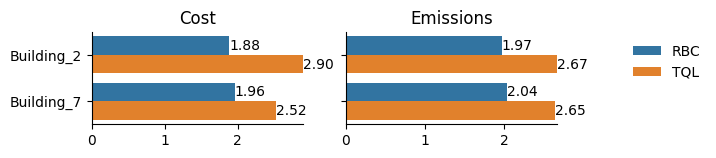

Building-level simulation period load profiles:


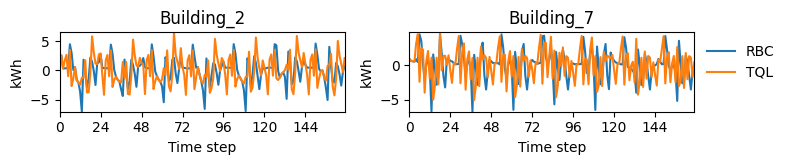

Building-level daily-average load profiles:


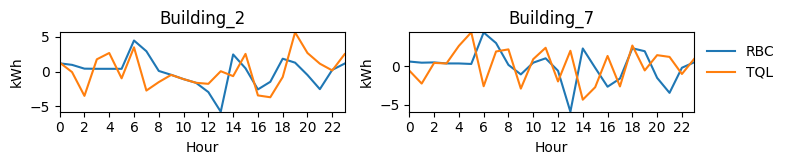

Battery SoC profiles:


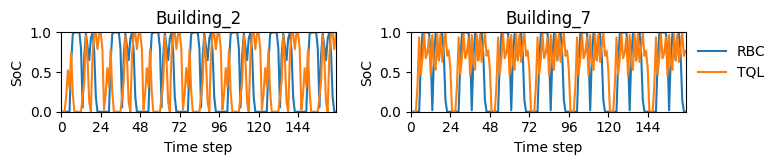

######## DISTRICT-LEVEL ########
District-level KPIs:


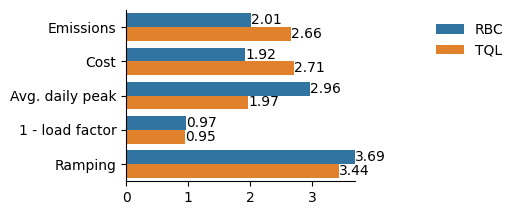

District-level simulation period load profiles:


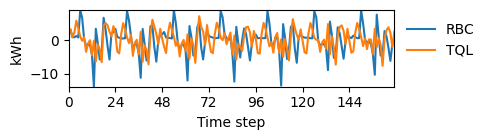

District-level daily-average load profiles:


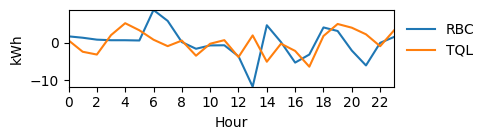

In [91]:
# ---------------- Tabular Q-Learning 평가 ----------------
# Gymnasium ≥0.26 은 reset() → (obs, info) 2-튜플을 돌려줍니다.
observations, _ = tql_env.reset()

# step() → (obs, reward, terminated, truncated, info)
terminated = truncated = False
while not (terminated or truncated):          # 또는 while not tql_env.terminated:
    actions = tql_model.predict(observations, deterministic=True)
    observations, _, terminated, truncated, _ = tql_env.step(actions)

# 결과 플롯
plot_simulation_summary({'RBC': rbc_env, 'TQL': tql_env})


The figures plotted for the Tabular Q-Learning are compared against the baseline and your tuned RBC. The Q-Learning agent has performed worse than the baseline and RBC in terms of the building-level and district-level KPIs. The net electricity consumption profile as a result of the Q-Learning agent shows unstable and spiky consumption. The reason for this behavior is seen in the battery SoC curves where the changes in SoC are abrupt. This highlights an issue with our discretized action space having too large steps as trade off for maintaining a reasonably-sized Q-Table. We also see that the agent did not learn the unique day-to-day building needs as the SoC profile is identical every 24 time steps. This is a consequence of using a single observation, hour to learn.

For the buildings 2 and 7 selected when the `RANDOM_SEED` = 0, we see that agent learned to charge the battery in building 2 in the early morning just after midnight and slightly charged and discharges during the day before completely depleting charge by midnight and into the early early hours if the next day. Building 7 on the other hand has 2 charge-discharge cycles each day that are split around noon.

Since the Q-Table is 2 dimensional, we can visualize and spot the the state-action combinations that maximize the Q-value below:

In [74]:
def plot_table(
    ax: plt.Axes, table: np.ndarray, title: str, cmap: str,
    colorbar_label: str, xlabel: str, ylabel: str
) -> plt.Axes:
    """Plot 2-dimensional table on a heat map.

    Parameters
    ----------
    ax: plt.Axes
        Figure axes
    table: np.ndarray
        Table array
    title: str
        axes title
    cmap: str
        Colormap
    colorbar_label: str
        Colorbar name
    xlabel: str
        Heat map x-axis label
    ylabel: str
        Heat map y-axis label

    Returns
    -------
    ax: plt.Axes
        Plotted axes
    """

    x = list(range(table.shape[0]))
    y = list(range(table.shape[1]))
    z = table.T
    pcm = ax.pcolormesh(
        x, y, z, shading='nearest', cmap=cmap,
        edgecolors='black', linewidth=0.0
    )
    _ = fig.colorbar(
        pcm, ax=ax, orientation='horizontal',
        label=colorbar_label, fraction=0.025, pad=0.08
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    return ax

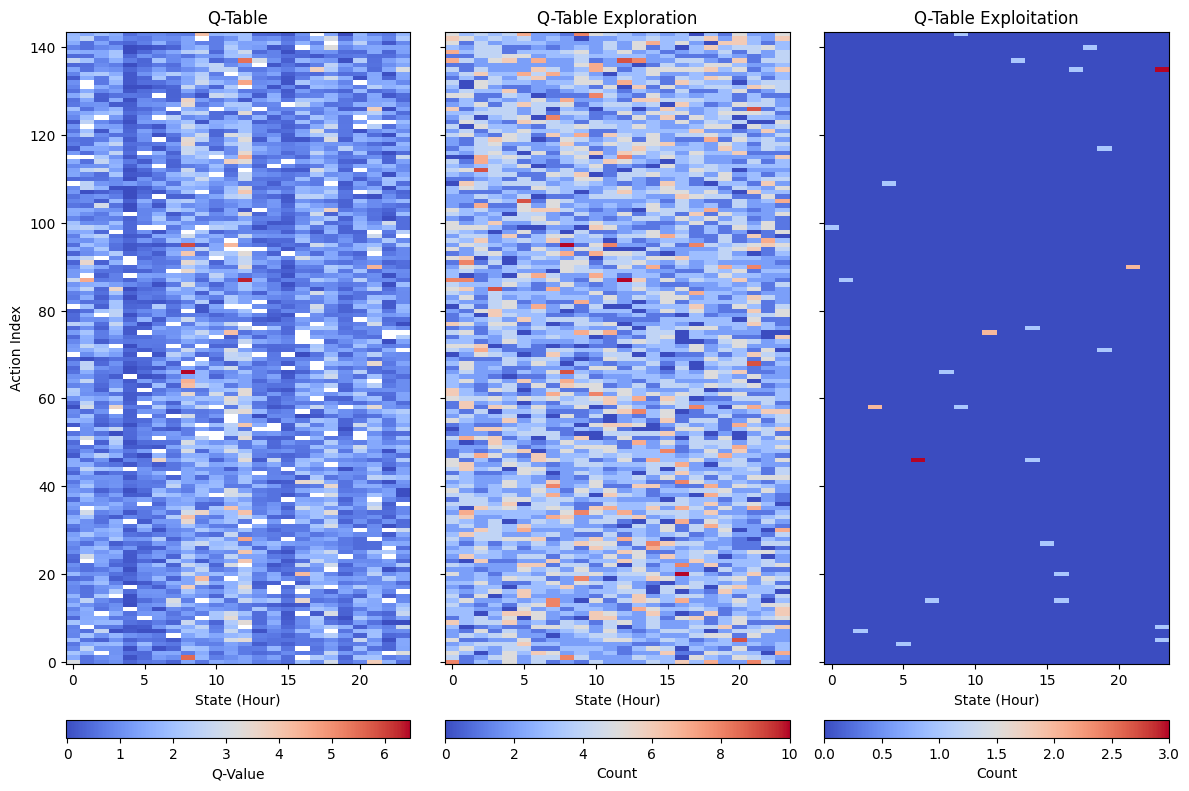

In [75]:
cmap = 'coolwarm'
figsize = (12, 8)
fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True)
axs[0] = plot_table(
    axs[0], tql_model.q[0], 'Q-Table',
    cmap, 'Q-Value', 'State (Hour)', 'Action Index'
)
axs[1] = plot_table(
    axs[1], tql_model.q_exploration[0], 'Q-Table Exploration',
    cmap, 'Count', 'State (Hour)', None
)
axs[2] = plot_table(
    axs[2], tql_model.q_exploitation[0], 'Q-Table Exploitation',
    cmap, 'Count', 'State (Hour)', None
)

plt.tight_layout()
plt.show()

The Q-Table shows (left) shows that for each hour, the Q-Values for most action indices are similar and very low (dark blue) asides the one action index that has been exploited. The middle heat map shows how many times each state-action pair was explored i.e. randomly chosen using $\epsilon$, and we see that while most pairs have been visited at least once, some pairs have the monopoly. The figure on the right shows how many times state-action pairs were exploited. For each state, only one action was ever an exploitation candidate. This shows that the algorithm spent much time exploring randomly and the first discovered exploitation candidate for each state remained till learning was terminated. We can tell the exploration-exploitation balance through $\epsilon$:

In [76]:
print(
    f'Current Tabular Q-Learning epsilon after {tql_episodes}'\
        f' episodes and {tql_model.time_step} time steps:', tql_model.epsilon
)

Current Tabular Q-Learning epsilon after 62 episodes and 11690 time steps: 0.9931237503428162


Epsilon is still high so there is a higher probability of random exploration. The Q-Learning agent updates epsilon using the following exponential decay formula:

$$
\epsilon = \textrm{max}(\epsilon_{\textrm{minimum}}, \epsilon_{0} \cdot e^{-\epsilon_{\textrm{decay}}*\textrm{episode}})
$$

where $\epsilon_{0}$ is $\epsilon$ at time step 0. Thus with the current decay rate, $\epsilon_{\textrm{decay}}$ we can visualize the number of episodes needed to get to at least 50-50 probability of exploration-exploitation:  

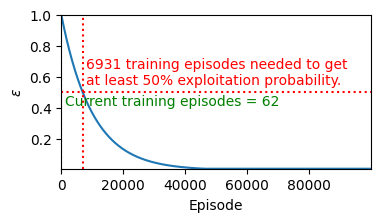

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
y = np.array([max(
    tql_model.minimum_epsilon,
    tql_model.epsilon_init*np.exp(-tql_model.epsilon_decay*e)
) for e in range(100_000)])
ref_x = len(y) - len(y[y <= 0.5]) - 1
ref_y = y[ref_x]
ax.plot(y)
ax.axvline(ref_x, color='red', linestyle=':')
ax.axhline(ref_y, color='red', linestyle=':')
ax.axvline(tql_episodes, color='green', linestyle=':')
ax.set_xlabel('Episode')
text = f'{ref_x} training episodes needed to get\nat least 50%'\
    ' exploitation probability.'
ax.text(ref_x + 1000, ref_y + 0.05, text, color='red')
ax.text(
    tql_episodes + 1000,
    ref_y - 0.1,
    f'Current training episodes = {tql_episodes}',
    va='bottom', color='green'
)
ax.set_ylabel(r'$\epsilon$')
plt.show()

Now that we have experimented with the Tabular Q-Learning algorithm, what issues can you identify with this control approach? Ponder on these questions:

1. How do the observations we use affect learning?
2. How does the table dimension affect learning?
4. What can we do to ensure that there is enough exploration of all state-action pairs?
6. In what building control applications/examples could Tabular Q-Learning work well?
7. In what building applications/examples will Tabular Q-Learning most likely fail?

## Replacing the Q-Table with a Function Approximator

Tabular Q-Learning is affected by the curse of dimensionality: as the size of the state space increases due to, e.g., continuous sensor inputs, the size of the Q-table has to necessarily increase is well. In particular for building control, the curse of dimensionality is significant, considering the potentially large number of sensors measuring various quantities (temperature, humidity, energy consumption, etc.) continuously. This means that the agent has an exponentially increasing number of state-action pairs to explore before it can converge to an optimal solution. Function approximators, e.g., linear regression or artificial neural networks ([Haykin (2009)](https://www.pearson.com/en-us/subject-catalog/p/neural-networks-and-learning-machines/P200000003278/9780133002553)), have been proposed as solutions that allow generalization by directly mapping the state-action pairs, $(s, a)$, to their respective Q-value, $Q(s, a)$. Refer to [Reinforcement learning for intelligent environments](https://www.taylorfrancis.com/chapters/edit/10.4324/9781315142074-37/reinforcement-learning-intelligent-environments-zoltan-nagy-june-young-park-josé-ramón-vázquez-canteli) for more information on how to make use of function approximators to improve learning in reinforcement learning control (RLC).

In the next section, we will introduce the soft-actor critic (SAC) algorithm, which is a model-free Q-Learning algorithm, that uses a neural network to approximate the Q-values thus, reducing the cost of training compared to Tabular Q-Learning.

# Optimize a Soft-Actor Critic Reinforcement Learning Controller
---

To control an environment like CityLearn that has continuous states and actions, tabular Q-learning is not practical, as it suffers from the _curse of dimensionality_. Actor-critic reinforcement learning (RL) methods use artificial neural networks to generalize across the state-action space. The actor network maps the current states to the actions that it estimates to be optimal. Then, the critic network evaluates those actions by mapping them, together with the states under which they were taken, to the Q-values.

<figure class="image">
  <img src="https://github.com/intelligent-environments-lab/CityLearn/blob/master/assets/images/sac_schematic.png?raw=true"  width="350" alt="SAC networks overview.">
  <figcaption>Figure: SAC networks overview (adopted from <a href="https://doi.org/10.1145/3408308.3427604">Vazquez-Canteli et al., 2020</a>).</figcaption>
</figure>

Soft actor-critic (SAC) is a model-free off-policy RL algorithm. As an off-policy method, SAC can reuse experience and learn from fewer samples. SAC is based on three key elements: an actor-critic architecture, off-policy updates, and entropy maximization for efficient exploration and stable training. SAC learns three different functions: the actor (policy), the critic (soft Q-function), and the value function.

This tutorial does not dive into the theory and algorithm of SAC but for interested participants please, refer to [Soft Actor-Critic Algorithms and Applications](https://doi.org/10.48550/arXiv.1812.05905).

We will now initialize a new environment and plug it to an SAC agent to help us solve our control problem. Luckily, we do not have to write our own implementation of the SAC algorithm. Instead, we can make use of Python libraries that have standardized the implementation of a number of RL algorithms. One of such libraries that we will use is [Stable Baselines3](https://stable-baselines3.readthedocs.io/en/master/index.html). At the time of writing, there are [13 different RL algorithms](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html#rl-algorithms) including SAC implemented between Stable Baselines3 and Stable-Baselines3 - Contrib (contrib package for Stable-Baselines3 - experimental reinforcement learning (RL) code).

The new environment is initialized below:

In [78]:
sac_env = CityLearnEnv(schema)

Before our environment is ready for use in Stable Baselines3, we need to take a couple of preprocessing steps in the form of wrappers. Firstly, we will wrap the environment using the `NormalizedObservationWrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.NormalizedObservationWrapper)) that ensure all observations that are served to the agent are [min-max normalized](https://www.codecademy.com/article/normalization) between [0, 1] and cyclical observations e.g. hour, are encoded using the [sine and cosine transformation](https://www.avanwyk.com/encoding-cyclical-features-for-deep-learning/).

In [79]:
sac_env = NormalizedObservationWrapper(sac_env)

Next, we wrap with the `StableBaselines3Wrapper` (see [docs](https://www.citylearn.net/api/citylearn.wrappers.html#citylearn.wrappers.StableBaselines3Wrapper)) that ensures observations, actions and rewards are served in manner that is compatible with Stable Baselines3 interface:

In [80]:
sac_env = StableBaselines3Wrapper(sac_env)

Now we can go ahead and initialize the SAC model:

In [81]:
sac_model = SAC(policy='MlpPolicy', env=sac_env, seed=RANDOM_SEED)

In order to track the progress of learning, we will use a loader as we have done before. Stable Baselines3 makes use of callbacks to help with performing user-defined actions and procedures during learning. However, you do not need to know the specifics of the code below beyond being aware that it is used to update the loader value and store aggregated rewards at each time step.

In [82]:
class CustomCallback(BaseCallback):
    def __init__(self, env: CityLearnEnv, loader: IntProgress):
        r"""Initialize CustomCallback.

        Parameters
        ----------
        env: Mapping[str, CityLearnEnv]
            CityLearn environment instance.
        loader: IntProgress
            Progress bar.
        """

        super().__init__(verbose=0)
        self.loader = loader
        self.env = env
        self.reward_history = [0]

    def _on_step(self) -> bool:
        r"""Called each time the env step function is called."""

        if self.env.time_step == 0:
            self.reward_history.append(0)

        else:
            self.reward_history[-1] += sum(self.env.rewards[-1])

        self.loader.value += 1

        return True

We will train the model for a fraction of the episodes we used to train the Tabular Q-Learning agent:

In [83]:
# ----------------- CALCULATE NUMBER OF TRAINING EPISODES -----------------
fraction = 0.25
sac_episodes = int(tql_episodes*fraction)
print('Fraction of Tabular Q-Learning episodes used:', fraction)
print('Number of episodes to train:', sac_episodes)
sac_episode_timesteps = sac_env.time_steps - 1
sac_total_timesteps = sac_episodes*sac_episode_timesteps

# ------------------------------- SET LOADER ------------------------------
sac_loader = get_loader(max=sac_total_timesteps)
display(sac_loader)

# ------------------------------- TRAIN MODEL -----------------------------
sac_callback = CustomCallback(env=sac_env, loader=sac_loader)
sac_model = sac_model.learn(
    total_timesteps=sac_total_timesteps,
    callback=sac_callback
)

Fraction of Tabular Q-Learning episodes used: 0.25
Number of episodes to train: 15


c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.time_steps to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.time_steps` for environment variables or `env.get_wrapper_attr('time_steps')` that will search the reminding wrappers.
  logger.warn(


IntProgress(value=0, description='Simulating:', max=2505, style=ProgressStyle(bar_color='maroon'))

c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.time_step to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.time_step` for environment variables or `env.get_wrapper_attr('time_step')` that will search the reminding wrappers.
  logger.warn(
c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.rewards to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.rewards` for environment variables or `env.get_wrapper_attr('rewards')` that will search the reminding wrappers.
  logger.warn(


With the SAC model trained, we will evaluate it for 1 episode using deterministic actions i.e. actions that maximized the Q-values during training as in the Tabular Q-Learning approach.

######## BUILDING-LEVEL ########
Building-level KPIs:


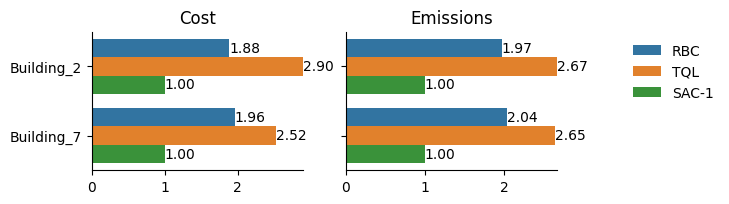

Building-level simulation period load profiles:


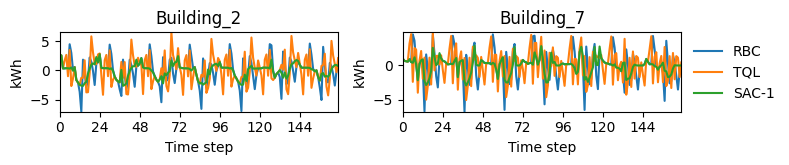

Building-level daily-average load profiles:


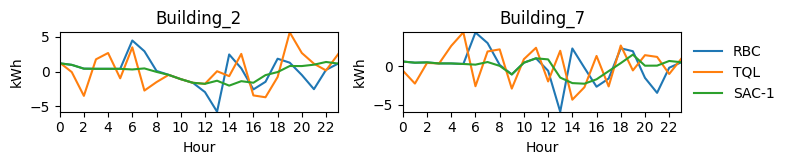

Battery SoC profiles:


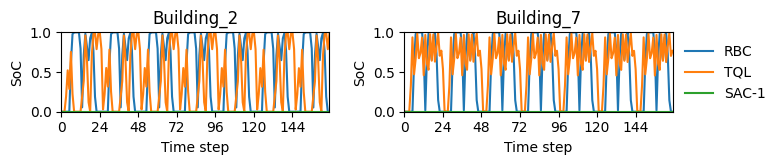

######## DISTRICT-LEVEL ########
District-level KPIs:


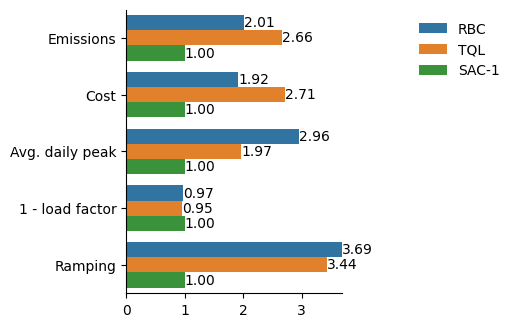

District-level simulation period load profiles:


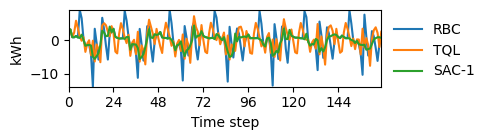

District-level daily-average load profiles:


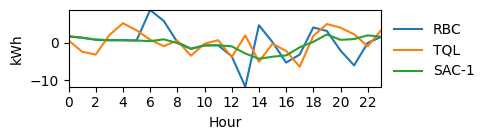

In [92]:
# ── reset ───────────────────────────────────────────────
observations, _ = sac_env.reset()     # info 무시
sac_actions_list = []

# ── rollout ─────────────────────────────────────────────
terminated = truncated = False
while not (terminated or truncated):
    actions, _ = sac_model.predict(observations, deterministic=True)
    observations, _, terminated, truncated, _ = sac_env.step(actions)
    sac_actions_list.append(actions)

# ── 결과 플롯 ────────────────────────────────────────────
plot_simulation_summary({
    'RBC':  rbc_env,
    'TQL':  tql_env,
    'SAC-1': sac_env          # 학습 후의 env
})


<img src="https://media.giphy.com/media/80TEu4wOBdPLG/giphy.gif" height=200></img>

The figures show that the SAC agent pretty much did not learn anything! The KPIs remain unchanged compared to the baseline and the battery SoCs are 0 all the time. What might be the case here? Let us have a look a the actions the SAC agent prescribed:

c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.buildings to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.buildings` for environment variables or `env.get_wrapper_attr('buildings')` that will search the reminding wrappers.
  logger.warn(


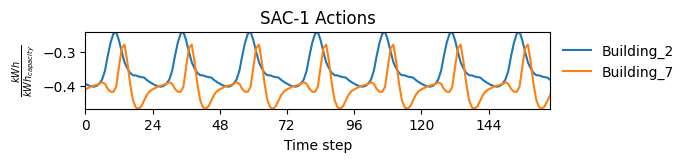

In [93]:
def plot_actions(actions_list: List[List[float]], title: str) -> plt.Figure:
    """Plots action time series for different buildings

    Parameters
    ----------
    actions_list: List[List[float]]
        List of actions where each element with index, i,
        in list is a list of the actions for different buildings
        taken at time step i.
    title: str
        Plot axes title

    Returns
    -------
    fig: plt.Figure
        Figure with plotted axes

    """

    fig, ax = plt.subplots(1, 1, figsize=(6, 1))
    columns = [b.name for b in sac_env.buildings]
    plot_data = pd.DataFrame(actions_list, columns=columns)
    x = list(range(plot_data.shape[0]))

    for c in plot_data.columns:
        y = plot_data[c].tolist()
        ax.plot(x, y, label=c)

    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
    ax.set_xlabel('Time step')
    ax.set_ylabel(r'$\frac{kWh}{kWh_{capacity}}$')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.set_title(title)

    return fig

fig = plot_actions(sac_actions_list, 'SAC-1 Actions')
plt.show()

<img src="https://media.giphy.com/media/b8RfbQFaOs1rO10ren/giphy.gif" height=200></img>

The SAC agent was calling for discharge all the time! To give it away, the reason for this behavior is the reward function that we have used to train the agent 😅.

Recall that the Bellman equation uses a reward, $r$, to update the Q-values hence the Q-Table is sensitive to the way the $r$ changes for $(s, a, s')$ tuple. That is to say, we need to make sure the reward we calculate after an action, $a$, is taken at state, $s$, quantifies how-well that action actually causes desirable next state, $s'$. If we define a poor reward function, we risk not learning quickly, or undesirable outcomes. See this example of the [implication of a poorly designed reward function](https://openai.com/research/faulty-reward-functions) where an agent learns to maximize a game score but with dangerous actions!

The reward function is a variable in the CityLearn environment. The [docs](https://www.citylearn.net/api/citylearn.reward_function.html) provides information on in-built reward functions that can be used in simulation. The reward function used at run time is that which is defined in the schema and used to construct the environment. It can be overridden by parsing an alternative reward function that inherits from the `citylearn.reward_function.RewardFunction` class (see [docs](https://www.citylearn.net/api/citylearn.reward_function.html#citylearn.reward_function.RewardFunction)). Let us see what the current reward is:

In [94]:
help(sac_env.reward_function)

Help on RewardFunction in module citylearn.reward_function object:

class RewardFunction(builtins.object)
 |  RewardFunction(env_metadata: Mapping[str, Any], exponent: float = None, **kwargs)
 |  
 |  Base and default reward function class.
 |  
 |  The default reward is the electricity consumption from the grid at the current time step returned as a negative value.
 |  
 |  Parameters
 |  ----------
 |  env_metadata: Mapping[str, Any]:
 |      General static information about the environment.
 |  **kwargs : dict
 |      Other keyword arguments for custom reward calculation.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env_metadata: Mapping[str, Any], exponent: float = None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calculate(self, observations: List[Mapping[str, Union[float, int]]]) -> List[float]
 |      Calculates reward.
 |      
 |      Parameters
 |      ----------
 |      observations: List[Mapping[str, Union[int, float]]

c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.reward_function to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reward_function` for environment variables or `env.get_wrapper_attr('reward_function')` that will search the reminding wrappers.
  logger.warn(


The current reward functions is the electricity consumption from the grid at the current time step returned as a negative value. While this reward will penalize high electricity consumption, it might not be ideal for all KPIs we are trying to optimize. As you would imagine, the best way to minimize electricity consumption is to try to move all loads to the battery hence, the insistence of the agent to continue to discharge the batteries!

## Defining a Custom Reward Function

We want to reduce electricity consumption but also reduce its cost and emissions. Likewise, we want to reduce the peaks and ramping, and increase the load factor. One way to achieve this is to teach the agent to charge the batteries when electricity is cheap after 9 PM and before 4 PM, which typically coincides with when the grid is cleaner (lower emissions). But recall that each building is able to generate power provided there is solar radiation. So, we can take advantage of self-generation in the late morning to late afternoon to charge for free and discharge the rest of the day thus reducing electricity consumption, cost and emissions at the very least. Also, by shifting the early morning and evening peak loads to the batteries we can improve on our peak and load-factor KPIs.

We should also teach our agent to ensure that renewable solar generation is not wasted by making use of the PV to charge the batteries while they are charged below capacity. On the flip side, the agent should learn to discharge when there is net positive grid load and the batteries still have stored energy.

Given these learning objectives, we can now define a reward function that closely satisfies the criteria for which the agent will learn good rewards:

$$
    r = \sum_{i=0}^n \Big(p_i \times |C_i|\Big)
$$

$$
    p_i = -\left(1 + \textrm{sign}(C_i) \times \textrm{SOC}^{\textrm{battery}}_i\right)
$$

The reward function, $r$, is designed to minimize electricity cost, $C$. It is calculated for each building, $i$ and summed to provide the agent with a reward that is representative of all $n$ buildings. It encourages net-zero energy use by penalizing grid load satisfaction when there is energy in the battery as well as penalizing net export when the battery is not fully charged through the penalty term, $p$. There is neither penalty nor reward when the battery is fully charged during net export to the grid. Whereas, when the battery is charged to capacity and there is net import from the grid the penalty is maximized.

Now we define this custom reward below and set it as the reward for the SAC agent.

In [ ]:
# class CustomReward(RewardFunction):
#     def __init__(self, env: CityLearnEnv):
#         r"""Initialize CustomReward.

#         Parameters
#         ----------
#         env: Mapping[str, CityLearnEnv]
#             CityLearn environment instance.
#         """

#         super().__init__(env)

#     def calculate(self) -> List[float]:
#         r"""Returns reward for most recent action.

#         The reward is designed to minimize electricity cost.
#         It is calculated for each building, i and summed to provide the agent
#         with a reward that is representative of all n buildings.
#         It encourages net-zero energy use by penalizing grid load satisfaction
#         when there is energy in the battery as well as penalizing
#         net export when the battery is not fully charged through the penalty
#         term. There is neither penalty nor reward when the battery
#         is fully charged during net export to the grid. Whereas, when the
#         battery is charged to capacity and there is net import from the
#         grid the penalty is maximized.

#         Returns
#         -------
#         reward: List[float]
#             Reward for transition to current timestep.
#         """

#         reward_list = []

#         for b in self.env.buildings:
#             cost = b.net_electricity_consumption_cost[-1]
#             battery_capacity = b.electrical_storage.capacity_history[0]
#             battery_soc = b.electrical_storage.soc[-1]/battery_capacity
#             penalty = -(1.0 + np.sign(cost)*battery_soc)
#             reward = penalty*abs(cost)
#             reward_list.append(reward)

#         reward = [sum(reward_list)]

#         return reward

In [105]:
class CustomReward(RewardFunction):
    def __init__(self, env: CityLearnEnv):
        self.env = env                 # ★ public 별칭
        super().__init__(env)

    def calculate(self, observations=None, **kwargs) -> List[float]:
        reward_sum = 0.0
        for b in self.env.buildings:   # 그대로 사용
            cost = b.net_electricity_consumption_cost[-1]
            capacity = b.electrical_storage.capacity_history[0]
            soc = b.electrical_storage.soc[-1] / capacity
            penalty = -(1.0 + np.sign(cost) * soc)
            reward_sum += penalty * abs(cost)

        return [reward_sum]


Let us repeat all the previous steps we took in the former SAC simulation where the only difference in the workflow here is the use of our new custom reward function:

In [106]:
# ----------------- INITIALIZE ENVIRONMENT -----------------
sacr_env = CityLearnEnv(schema)

# -------------------- SET CUSTOM REWARD -------------------
sacr_env.reward_function = CustomReward(sacr_env)

# -------------------- WRAP ENVIRONMENT --------------------
sacr_env = NormalizedObservationWrapper(sacr_env)
sacr_env = StableBaselines3Wrapper(sacr_env)

# -------------------- INITIALIZE AGENT --------------------
sacr_model = SAC(policy='MlpPolicy', env=sacr_env, seed=RANDOM_SEED)


# ----------------------- SET LOADER -----------------------
print('Number of episodes to train:', sac_episodes)
sac_modr_loader = get_loader(max=sac_total_timesteps)
display(sac_modr_loader)

# ----------------------- TRAIN AGENT ----------------------
sacr_callback = CustomCallback(env=sacr_env, loader=sac_modr_loader)
sacr_model = sacr_model.learn(
    total_timesteps=sac_total_timesteps,
    callback=sacr_callback
)

Number of episodes to train: 15


IntProgress(value=0, description='Simulating:', max=2505, style=ProgressStyle(bar_color='maroon'))

c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.time_step to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.time_step` for environment variables or `env.get_wrapper_attr('time_step')` that will search the reminding wrappers.
  logger.warn(
c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.rewards to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.rewards` for environment variables or `env.get_wrapper_attr('rewards')` that will search the reminding wrappers.
  logger.warn(


Finally, evaluate the trained model:

######## BUILDING-LEVEL ########
Building-level KPIs:


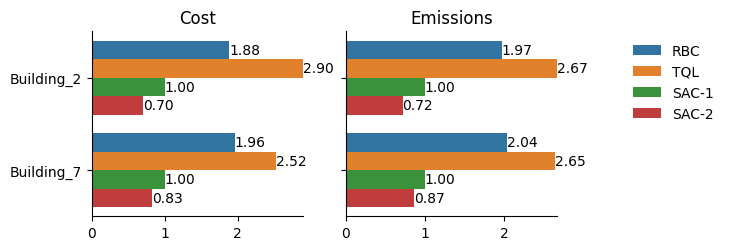

Building-level simulation period load profiles:


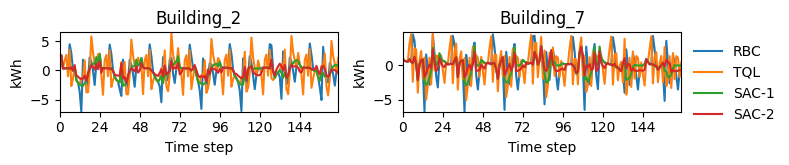

Building-level daily-average load profiles:


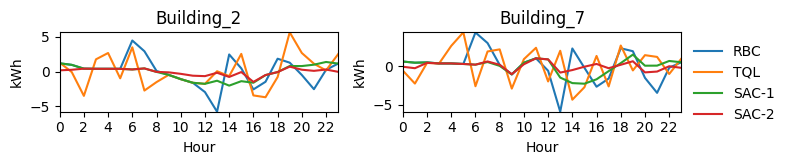

Battery SoC profiles:


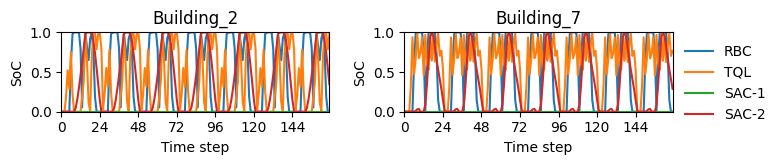

######## DISTRICT-LEVEL ########
District-level KPIs:


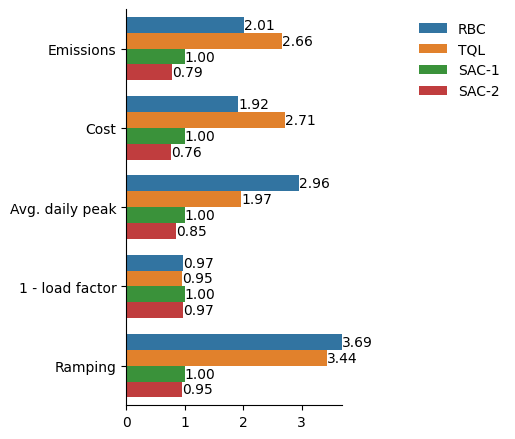

District-level simulation period load profiles:


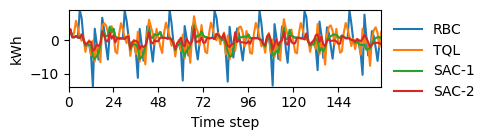

District-level daily-average load profiles:


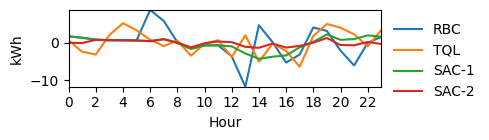

In [107]:
# ---------- evaluation loop (Gymnasium >= 0.28 호환) ----------
observations, _ = sacr_env.reset()        # 2-tuple
sacr_actions_list = []

terminated = truncated = False
while not (terminated or truncated):       # 또는 while not sacr_env.terminated:
    actions, _ = sacr_model.predict(observations, deterministic=True)
    observations, _, terminated, truncated, _ = sacr_env.step(actions)
    sacr_actions_list.append(actions)

# ---------- 결과 플롯 ----------
plot_simulation_summary(
    {
        'RBC':  rbc_env,
        'TQL':  tql_env,
        'SAC-1': sac_env,   # 기존 SAC(기본 reward)
        'SAC-2': sacr_env   # 커스텀 reward로 재학습한 SAC
    }
)


Finally, we have results that have improved the baseline KPIs all thanks to our custom reward function! The agent has learned to take advantage of the solar generation to charge the batteries and discharge the stored energy during the evening peak.

Let us now have a look at the actions that the agent predicted in the deterministic simulation:

c:\Users\User\anaconda3\envs\citylearn\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.buildings to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.buildings` for environment variables or `env.get_wrapper_attr('buildings')` that will search the reminding wrappers.
  logger.warn(


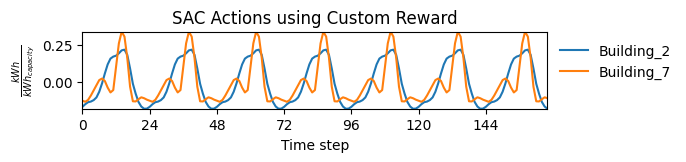

In [108]:
fig = plot_actions(sacr_actions_list, 'SAC Actions using Custom Reward')
plt.show()

The agent learned the different building needs as building 7 begins to charge later than building 2 daily (selected buildings when `RANDOM_SEED` = 0). The agent discharges the batteries differently as well.

## Evaluate the Episode Rewards for RL Algorithms

We can also investigate the convergence rate in training by looking at the sum of rewards in each episode. We expect to see the reward sum increase as we train on more episodes and eventually plateau when exploitation increases or performance can not be further improved. We will look at the reward trajectory for the Tabular Q-Learning, SAC with and without custom reward models:

In [109]:
def plot_rewards(ax: plt.Axes, rewards: List[float], title: str) -> plt.Axes:
    """Plots rewards over training episodes.

    Parameters
    ----------
    rewards: List[float]
        List of reward sum per episode.
    title: str
        Plot axes title

    Returns
    -------
    ax: plt.Axes
        Plotted axes
    """

    ax.plot(rewards)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.set_title(title)

    return ax

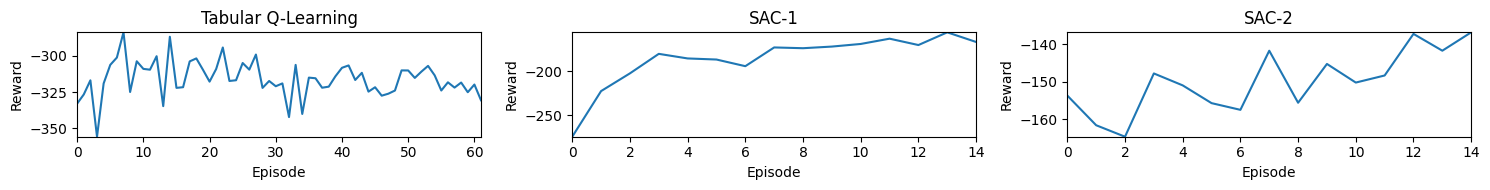

In [110]:
rewards = {
    'Tabular Q-Learning': tql_model.reward_history[:tql_episodes],
    'SAC-1': sac_callback.reward_history[:sac_episodes],
    'SAC-2': sacr_callback.reward_history[:sac_episodes]
}
fig, axs = plt.subplots(1, 3, figsize=(15, 2))

for ax, (k, v) in zip(fig.axes, rewards.items()):
    ax = plot_rewards(ax, v, k)

plt.tight_layout()
plt.show()

Some questions to ponder on:
1. What do you notice in the reward trajectories for the three models?
2. Which model converged?
3. Which model did not learn anything?
4. Which model needs to train some more?

# Tune your SAC Agent
---

Thus far, you have learned to manage battery charge/discharge for a district of buildings by 1) tuning your own rule-based control (RBC) agent, 2) training a Tabular Q-Learning agent, 3) implementing the soft-actor critic (SAC) off-policy reinforcement learning (RL) algorithm with and crude reward function and a better tailored reward function.

When each control agent is evaluated on the a set of building-level and district-level KPIs, we find that if carefully tuned, your RBC will improve the baseline albeit a painstaking effort. The Tabular Q-Learning agent has the potential to adapt to unique building properties but suffers from the curse of dimensionality affecting its convergence to an optimal solution for the battery management. We also find that the SAC agent is sensitive to the reward function design and with a custom reward that is tailored towards achieving our evaluation KPIs, we can achieve a performance that is better than the baseline case and potentially better than an averagely tuned RBC.

However, we find that the SAC + custom reward case did not converge after our set number of training episodes. Also, the improvements it provides beyond the baseline are not very large. Hence, there is still room for improvement.

In the next cells, you will improve the SAC model by:
1. Revising the custom reward function with a function you deem more appropriate towards optimizing the KPIs. Perhaps, you can design a reward function that targets a specific KPI. You can also keep the current custom reward function.
2. Changing the length of training i.e. episodes.
3. Optimizing the SAC hyperparameters. In our previous models, we used the default Stable Baselines3 hyperparameters. Hyperparameter tuning is an _art_ of its own. Refer to the [Stable Baselines3 SAC docs](https://stable-baselines3.readthedocs.io/en/master/modules/sac.html#stable_baselines3.sac.SAC) to learn about the SAC hyperparameters. Also, refer to [Training with Soft-Actor Critic](https://github.com/yosider/ml-agents-1/blob/master/docs/Training-SAC.md#training-with-soft-actor-critic) for a more elaborate description of what the hyperparameters mean, their typical values and appropriate values for different case scenarios.

You may also choose to update the active observations. Recall that thus far, we have only used the `hour` observation. Refer to the [CityLearn Observation docs](https://www.citylearn.net/overview/observations.html) to discover other available environment observations.

## Set Environment, Agent and Reward Function

The next cell is a __recipe__ for your tuned SAC and custom environment:

In [ ]:
# -------------------- CUSTOMIZE **YOUR** ENVIRONMENT --------------------
# Include other observations if needed.
# See https://www.citylearn.net/overview/observations.html
# for table of observations that you can include
# NOTE: More active observations could mean longer trainer time.
your_active_observations = [
    'hour',
    # 'day_type'
]

# ------------------ SET **YOUR** AGENT HYPERPARAMETERS ------------------
# try out different hyperparameter value combinations to see
# which one provides you with the best KPIs. See
# https://github.com/yosider/ml-agents-1/blob/master/docs/Training-SAC.md#training-with-soft-actor-critic
# for a guide on how to select hyperparameter values.
your_agent_kwargs = {
    'learning_rate': 0.0003,
    'buffer_size': 1000000,
    'learning_starts': 100,
    'batch_size': 256,
    'tau': 0.005,
    'gamma': 0.99,
    'train_freq': 1,
}

# --------------- SET **YOUR** NUMBER OF TRAINING EPISODES ---------------
your_episodes = sac_episodes

# --------------- DEFINE **YOUR** CUSTOM REWARD FUNCTION -----------------
class YourCustomReward(CustomReward):
    def __init__(self, env: CityLearnEnv):
        r"""Initialize CustomReward.

        Parameters
        ----------
        env: Mapping[str, CityLearnEnv]
            CityLearn environment instance.
        """

        super().__init__(env)

    def calculate(self) -> List[float]:
        r"""Returns reward for most recent action.

        <Provide a description for your custom reward>.

        Parameters
        ----------
        reward: List[float]
            Reward for transition to current timestep.
        """

        # comment the next line of code and define your custom reward otherwise,
        # leave as is to use the previously defined custom reward function.
        reward = super().calculate()

        return reward

## Train

Here we define one function that performs all the procedures we took to train the SAC agent from selecting buildings, simulation period and active observations to initializing and wrapping the environment, initializing the agent, training it a nd reporting it's results:

In [ ]:
def train_your_custom_sac(
    agent_kwargs: dict, episodes: int, reward_function: RewardFunction,
    building_count: int, day_count: int, active_observations: List[str],
    random_seed: int, reference_envs: Mapping[str, CityLearnEnv] = None,
    show_figures: bool = None
) -> dict:
    """Trains a custom soft-actor critic (SAC) agent on a custom environment.

    Trains an SAC agent using a custom environment and agent hyperparamter
    setup and plots the key performance indicators (KPIs), actions and
    rewards from training and evaluating the agent.

    Parameters
    ----------
    agent_kwargs: dict
        Defines the hyperparameters used to initialize the SAC agent.
    episodes: int
        Number of episodes to train the agent for.
    reward_function: RewardFunction
        A base or custom reward function class.
    building_count: int
        Number of buildings to set as active in schema.
    day_count: int
        Number of simulation days.
    active_observations: List[str]
        Names of observations to set active to be passed to control agent.
    random_seed: int
        Seed for pseudo-random number generator.
    reference_envs: Mapping[str, CityLearnEnv], default: None
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    show_figures: bool, default: False
        Indicate if summary figures should be plotted at the end of
        evaluation.

    Returns
    -------
    result: dict
        Results from training the agent as well as some input variables
        for reference including the following value keys:

            * random_seed: int
            * env: CityLearnEnv
            * model: SAC
            * actions: List[float]
            * rewards: List[float]
            * agent_kwargs: dict
            * episodes: int
            * reward_function: RewardFunction
            * buildings: List[str]
            * simulation_start_time_step: int
            * simulation_end_time_step: int
            * active_observations: List[str]
            * train_start_timestamp: datetime
            * train_end_timestamp: datetime
    """

    # get schema
    schema = DataSet.get_schema('citylearn_challenge_2022_phase_all')

    # select buildings
    schema, buildings = set_schema_buildings(
        schema, building_count, random_seed
    )
    print('Selected buildings:', buildings)

    # select days
    schema, simulation_start_time_step, simulation_end_time_step =\
        set_schema_simulation_period(schema, day_count, random_seed)
    print(
        f'Selected {day_count}-day period time steps:',
        (simulation_start_time_step, simulation_end_time_step)
    )

    # set active observations
    schema = set_active_observations(schema, active_observations)
    print(f'Active observations:', active_observations)

    # initialize environment
    env = CityLearnEnv(schema, central_agent=True)

    # set reward function
    env.reward_function = reward_function(env=env)

    # wrap environment
    env = NormalizedObservationWrapper(env)
    env = StableBaselines3Wrapper(env)

    # initialize agent
    model = SAC('MlpPolicy', env, **agent_kwargs, seed=random_seed)

    # initialize loader
    total_timesteps = episodes*(env.time_steps - 1)
    print('Number of episodes to train:', episodes)
    loader = get_loader(max=total_timesteps)
    display(loader)

    # initialize callback
    callback = CustomCallback(env=env, loader=loader)

    # train agent
    train_start_timestamp = datetime.utcnow()
    model = model.learn(total_timesteps=total_timesteps, callback=callback)
    train_end_timestamp = datetime.utcnow()

    # evaluate agent
    observations = env.reset()
    actions_list = []

    while not env.done:
        actions, _ = model.predict(observations, deterministic=True)
        observations, _, _, _ = env.step(actions)
        actions_list.append(actions)

    # get rewards
    rewards = callback.reward_history[:episodes]

    # plot summary and compare with other control results
    if show_figures is not None and show_figures:
        env_id = 'Your-SAC'

        if reference_envs is None:
            reference_envs = {env_id: env}
        else:
            reference_envs = {env_id: env, **reference_envs}

        plot_simulation_summary(reference_envs)

        # plot actions
        plot_actions(actions_list, f'{env_id} Actions')

        # plot rewards
        _, ax = plt.subplots(1, 1, figsize=(5, 2))
        ax = plot_rewards(ax, rewards, f'{env_id} Rewards')
        plt.tight_layout()
        plt.show()

    else:
        pass

    return {
        'random_seed': random_seed,
        'env': env,
        'model': model,
        'actions': actions_list,
        'rewards': rewards,
        'agent_kwargs': agent_kwargs,
        'episodes': episodes,
        'reward_function': reward_function,
        'buildings': buildings,
        'simulation_start_time_step': simulation_start_time_step,
        'simulation_end_time_step': simulation_end_time_step,
        'active_observations': active_observations,
        'train_start_timestamp': train_start_timestamp,
        'train_end_timestamp': train_end_timestamp,
    }

Now, we shall train!!

<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMWU5NzcxNGQzODRiYmI0MzQwNDVlYWU1NjhjODI0ZDhhZDhlNzM3NCZjdD1n/KGYmNdjOUxkFO8JVbM/giphy.gif" height=200></img>

Note that you can use a for loop to train on different `agent_kwargs` combinations in order to find which hyperparameters give the best results.

In [ ]:
your_results = train_your_custom_sac(
    agent_kwargs=your_agent_kwargs,
    episodes=your_episodes,
    reward_function=YourCustomReward,
    building_count=BUILDING_COUNT,
    day_count=DAY_COUNT,
    active_observations=your_active_observations,
    random_seed=RANDOM_SEED,
    reference_envs={
        'RBC': rbc_env,
        # 'TQL': tql_env,
        'SAC-1': sac_env,
        'SAC-2': sacr_env
    },
    show_figures=True,
)

## Submit

You may choose to submit __your results__ to the [scoreboard](https://docs.google.com/spreadsheets/d/1wI1mz7fFiNNc1eZvZfKu_Id23y3QAzL_joVmiqUHm2U/edit?resourcekey#gid=939604299). To this we will programmatically submit your results to a Google Form that live updates the scoreboard in a Google Sheet.

Run the following cell to set the function that helps us with the submission.

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where the result submission function is defined.

In [ ]:
def post_results(tag: str, results: dict) -> Tuple[dict, requests.Response]:
    """Submit your trained SAC model results to public scoreboard.

    Submits trained SAC model results to a Google Form and results
    are displayed and ranked in Google Sheets.

    Parameters
    ----------
    tag: str
        A name to use to identify submitted results in scoreboard.
        Avoid including personal identifiers in the tag.
    results: dict
        Mapping of results from your simulation. It is the variable returned
        by the :code:`train_your_custom_sac` function.

    Returns
    -------
    payload: dict
        Submitted results.
    response: requests.Response
        Form post request response.
    """

    # submission for ID
    form_id = '1FAIpQLSc69VR3t5z7ag6ydvv11mDpdBS8ruhz4yBfWD_81IUZ2IYtEw'

    # url to get and fill the form
    get_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform?usp=sf_link'

    # url to submit the form
    post_url = f'https://docs.google.com/forms/u/1/d/e/{form_id}/formResponse'

    # get KPIs
    kpis = get_kpis(results['env']).pivot(
        index='kpi', columns='name', values='value'
    ).to_dict()
    kpis = {k: {
        k_: float(v_) for k_, v_ in v.items() if not math.isnan(v_)
    } for k, v in kpis.items()}

    # set payload
    datetime_fmt = '%Y-%m-%d %H:%M:%S'
    buildings = [int(b.split('_')[-1]) for b in results['buildings']]
    buildings = sorted(buildings)
    buildings = ', '.join([str(b) for b in buildings])
    payload = {
        'uid': uuid.uuid4().hex,
        'create_timestamp': datetime.utcnow().strftime(datetime_fmt),
        'train_start_timestamp': results['train_start_timestamp'].strftime(datetime_fmt),
        'train_end_timestamp': results['train_end_timestamp'].strftime(datetime_fmt),
        'tag': '' if tag is None else tag,
        'random_seed': results['random_seed'],
        'buildings': buildings,
        'simulation_start_time_step': int(results['simulation_start_time_step']),
        'simulation_end_time_step': int(results['simulation_end_time_step']),
        'episodes': results['episodes'],
        'active_observations': ', '.join(sorted(results['active_observations'])),
        'agent_name': str(results['model'].__class__),
        'agent_kwargs': results['agent_kwargs'],
        'reward_function_calculate': inspect.getsource(results['reward_function'].calculate),
        'kpis': kpis,
        'district_electricity_consumption': kpis['District']['electricity_consumption'],
        'district_cost': kpis['District']['cost'],
        'district_carbon_emissions': kpis['District']['carbon_emissions'],
        'district_ramping': kpis['District']['ramping'],
        'district_average_daily_peak': kpis['District']['average_daily_peak'],
        'district_load_factor': kpis['District']['1 - load_factor'],
    }

    # get form question IDs
    response = requests.get(get_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    pattern = re.compile('var FB_PUBLIC_LOAD_DATA_ = (.*?);')
    string = soup.findAll(
        'script', string=pattern
    )[0].string.split(' = ')[-1][:-1]
    questions = json.loads(string)[1][1]
    questions = {q[1]: q[4][0][0] for q in questions}

    # set form question answers
    payload = {k: json.dumps(payload[k]) for k, v in questions.items()}
    parsed_payload = {f'entry.{questions[k]}': v for k, v in payload.items()}

    # submit form
    response = requests.post(post_url, data=parsed_payload)

    return payload, response

Finally, run the following cell to set up the submission interface.

> ⚠️ **NOTE**:
> You do not need to understand the content of the next code cell where the result submission user interface is defined.

In [ ]:
# instructions
instructions = """
<h1>Submit your Results</h1>
<p>Use this interactive widget to submit the results of your tuned SAC
agent!</p>

<p style="color:yellow"><strong>NOTE:</strong> The scoreboard
is merely an informational tool. Please, we urge participants
to adhere to fair use practices including but not limited to:

<ul style="color:yellow">
    <li>Do not spam the scoreboard.</li>
    <li>Make only one submission for every custom agent
    and environment set up.</li>
    <li>Do not make alterations to the
    <code>post_results</code> function.</li>
</ul>

</p>

<p>Your results are displayed in the
<a href="https://docs.google.com/spreadsheets
/d/1wI1mz7fFiNNc1eZvZfKu_Id23y3QAzL_joVmiqUHm2U/
edit?resourcekey#gid=939604299" target="_blank">scoreboard</a>.</p>


<p><strong>Provide a tag (avoid personal identifiers)
for your submission and hit the <strong>Submit</strong> button:</strong></p>
"""
instructions_html_ui = HTML(value=instructions, placeholder='Instructions')


# tag text input
tag_text_ui = Text(
    value='',
    placeholder='Provide a submission tag',
    description='Tag:',
    disabled=False
)

# submit button
submit_button_ui = Button(
    description='Submit',
    disabled=True,
    button_style='success',
    tooltip='Submit your Results',
    icon='check'
)
interactions_ui = HBox([tag_text_ui, submit_button_ui])

# post-submission html
post_submission_html_ui = HTML(value='', placeholder='Post submission report')

def on_tag_value_change(change):
    """Activate/deactivate submit button based on tag value."""

    value = tag_text_ui.value.strip(' ')

    if len(value) > 0:
        submit_button_ui.disabled = False
    else:
        submit_button_ui.disabled = True

def on_submit_button_ui_clicked(b):
    """Submit your results when submit button is clicked."""

    # set UI pre-submission states
    tag_text_ui.disabled = True
    submit_button_ui.disabled = True
    current_submit_button_description = submit_button_ui.description
    submit_button_ui.description = 'Submitting ...'
    tag = tag_text_ui.value.strip()
    post_submission_html_ui.value = ''

    # make submission
    payload, response = post_results(tag, your_results)

    # confirm successful submission
    try:
        assert response.status_code == 200
        assert 'Your response has been recorded' in response.text
        post_submission_html = f"""
        <p style="color:green">Your last submission
        on "{payload['create_timestamp'].strip('"')} UTC"
        with tag: {payload['tag']}
        and unique ID: {payload['uid']}
        was successful!</p>
        """

    except AssertionError:
        post_submission_html = f"""
        <p style="color:red">Your last submission
        on "{payload['create_timestamp'].strip('"')} UTC"
        with tag: {payload['tag']}
        was unsuccessful!</p>
        """


    # set UI post-submission states
    submit_button_ui.description = current_submit_button_description
    tag_text_ui.value = ''
    tag_text_ui.disabled = False
    submit_button_ui.disabled = False
    post_submission_html_ui.value = post_submission_html


# callbacks
tag_text_ui.observe(on_tag_value_change, names='value')
submit_button_ui.on_click(on_submit_button_ui_clicked)

# show UI
ui = VBox([instructions_html_ui, interactions_ui, post_submission_html_ui])
display(ui)

# Next Steps
---

Now that you are a _CityLearner_, here are some next steps and ideas (asides the awesome ideas you probably already have of course 😉):


## The CityLearn Challenge 2023

[The CityLearn Challenge 2023](https://www.aicrowd.com/challenges/neurips-2023-citylearn-challenge) addresses this multi-faceted nature of advanced control in buildings by blending the challenges of control algorithm design, forecast quality and grid-resilience. The CityLearn Challenge 2023 presents a control track as done in previous challenges as well as introduces an independent forecast track where, both tracks are run in parallel and utilize the same dataset.

In the control track, participants will develop energy management agent(s) and an optional custom reward function (in RLC solutions) to manage electrical and domestic hot water energy storage systems, and heat pump power in a synthetic single-family neighborhood under normal grid-operation and power outages. Whereas, in the forecast problem, participants will design regression models to predict the 48-hour-ahead end-use load profiles for each building in the neighborhood as well as the neighborhood-level 48-hour-ahead solar generation and carbon intensity profiles.

## Other Ideas

- Rerun the entire tutorial with a new [RANDOM_SEED](#scrollTo=vfnO0QBszXcS&line=1&uniqifier=1), [number of buildings](#scrollTo=6C6S46xmz50t&line=2&uniqifier=1) (between 1 - 15), [number of days](#scrollTo=6C6S46xmz50t&line=5&uniqifier=1) (1 - 365) and/or [observations](#scrollTo=6C6S46xmz50t&line=8&uniqifier=1). Remember to [set the number of discretization bins](#scrollTo=_6HotiSW4Pe8&line=2&uniqifier=1) for Tabular Q-Learning if you use other observations in your simulations.
- How does the Tabular Q-Learning agent perform with a different set of hyperparameters and/or active observations?
- How well does the Tabular Q-Learning learn if we use the custom reward function we defined? Are there any improvements compared to the original reward function?
- Try to train the SAC agent on all the buildings and the full one-year period in the `citylearn_challenge_2022_phase_all` dataset.
- Can you still improve some KPIs without self-generation in the buildings i.e. no photovoltaic (PV) system?
- In our hand-on experiments here, we trained and tested on the same days. In reality, when an RL agent is deployed, it may experience states and state transitions that were not seen during training. Try to evaluate your trained agent on a different sequence of days and see if your trained agent generalizes well.
- Try out the other datasets in CityLearn.
- Bring your own dataset to CityLearn!
- \<Insert __YOUR__ ideas 🙂\>

<img src="https://media.giphy.com/media/3ohs86vZAWiJXWvQI0/giphy.gif" height=200></img>